# Install Requirements

In [1]:
%pip install pandas matplotlib matplotlib-venn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_15830/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load Data

In [3]:
from pathlib import Path

REPOSITORY_PATH = Path().absolute().parent
DATA_DIR = REPOSITORY_PATH / Path("data")

assert DATA_DIR.is_dir()

## Load Sources DB

In [4]:
prefixes = ["https://", "http://", "www.", '"']
suffixes = ["/", '"']


def strip_url(url: str) -> str:
    for prefix in sorted(prefixes):
        if url.startswith(prefix):
            url = url[len(prefix) :]
    for suffix in sorted(suffixes):
        if url.endswith(suffix):
            url = url[: -len(suffix)]
    return url.strip()


urls = [
    "http://muurmooi.nl/",
    "museumpassmusees.be",
    '"wikipedia.org "',
    "http://www.fonq.nl",
]
expecteds = ["muurmooi.nl", "museumpassmusees.be", "wikipedia.org", "fonq.nl"]

for url, expected in zip(urls, expecteds):
    stripped = strip_url(url)
    assert stripped == expected, f"Got: {stripped}\tExpected: {expected}"

In [5]:
BRONNEN_DB_DIR = DATA_DIR / Path(
    "f97a61e7-0270-42e5-83b2-c5455a64cacf_Export-d7865d0b-a9d8-41e8-a97d-041c871b6774"
)
assert BRONNEN_DB_DIR.is_dir()

BRONNEN_FILE = BRONNEN_DB_DIR / Path(
    "Bronnen DB ebb1bca364c64cfebc8109b4fc3951eb_all.csv"
)
assert BRONNEN_FILE.is_file()

In [6]:
sources = (
    pd.read_csv(
        BRONNEN_FILE,
        keep_default_na=True,
        dtype={"uBlocked trackers": "Int64"},
        converters={"Name": strip_url},
    )
    .dropna(subset=["Name", "NR"])
    .set_index("Name", verify_integrity=True)
)
sources.head()

URL Domein   Onderwerpen  \
Name                                                            
24baby.nl                https://www.24baby.nl/           NaN   
24kitchen.nl           https://www.24kitchen.nl           NaN   
333travel.nl          https://www.333travel.nl/           NaN   
absolutefacts.nl  https://www.absolutefacts.nl/  geschiedenis   
accuautoshop.nl    https://www.accuautoshop.nl/           NaN   

                                    Sector  \
Name                                         
24baby.nl         Winkels en bedrijven div   
24kitchen.nl       Entertainment-industrie   
333travel.nl              Reisorganisaties   
absolutefacts.nl         Internetbedrijven   
accuautoshop.nl   Winkels en bedrijven div   

                                                            Reclame  \
Name                                                                  
24baby.nl                                          over_the_top_ads   
24kitchen.nl      company_promotion, limited_ads, sluikreclame -...   
333travel.nl                                      company_promotion   
absolutefacts.nl                                  company_promotion   
accuautoshop.nl                                   company_promotion   

                  uBlocked trackers Commercialiteit Div Labels NGO  \
Name                                                                 
24baby.nl                         5     commercieel            NaN   
24kitchen.nl                     17     commercieel            NaN   
333travel.nl                      7     commercieel            NaN   
absolutefacts.nl                  2     commercieel            NaN   
accuautoshop.nl                   6     commercieel            NaN   

                                        Conclusie over doel vd bron  \
Name                                                                  
24baby.nl         div. commercieel informatieproducten, reclamev...   
24kitchen.nl      div. commercieel informatieproducten, entertai...   
333travel.nl                       webshop/winkel+promotioneel deel   
absolutefacts.nl               div. commercieel informatieproducten   
accuautoshop.nl                    webshop/winkel+promotioneel deel   

                                        Vrije labels bron/onderwerp  \
Name                                                                  
24baby.nl         nieuws, promotioneel, reclamevehikel, webshop,...   
24kitchen.nl              entertainment, infotainment, promotioneel   
333travel.nl      (product)informatie ihkv verkoop/bezoek, bedri...   
absolutefacts.nl                   informatie_primair_doel, webshop   
accuautoshop.nl                                             webshop   

                 Thumbs up 8-14?  ...               Created time  \
Name                              ...                              
24baby.nl           Just-in-case  ...  November 6, 2023 11:09 AM   
24kitchen.nl        Just-in-case  ...  December 14, 2023 6:43 PM   
333travel.nl        Just-in-case  ...  February 23, 2024 5:35 PM   
absolutefacts.nl         Twijfel  ...  December 14, 2023 7:29 PM   
accuautoshop.nl              Nee  ...  February 22, 2024 3:23 PM   

                        Created by  \
Name                                 
24baby.nl         Maarten Sprenger   
24kitchen.nl      Maarten Sprenger   
333travel.nl      Maarten Sprenger   
absolutefacts.nl  Maarten Sprenger   
accuautoshop.nl   Maarten Sprenger   

                                                  URL Moederbedrijf  \
Name                                                                  
24baby.nl                                                       NaN   
24kitchen.nl      https://privacy.thewaltdisneycompany.com/nl/de...   
333travel.nl                                                    NaN   
absolutefacts.nl                    https://www.absolutefigures.nl/   
accuautoshop.nl                                                 NaN   

                 SlimZ Resultat

In [7]:
sources.columns

Index(['URL Domein', 'Onderwerpen', 'Sector', 'Reclame', 'uBlocked trackers',
       'Commercialiteit', 'Div Labels NGO', 'Conclusie over doel vd bron',
       'Vrije labels bron/onderwerp', 'Thumbs up 8-14?', 'Status',
       'About page', ' Notes', 'Kwaliteit_about', 'Instelling/Bedrijf/Persoon',
       'Resultaten: vrije labels', 'Moederbedrijf DB', 'NR', 'Resultaten DB',
       'Extra URL', 'Created time', 'Created by', 'URL Moederbedrijf',
       'SlimZ Resultaten DB', 'Resultaten: toegankelijkheid',
       'Cookie info page', 'More examples', 'Toegankelijkheidspagina',
       'Related to Resultaten DB 01 (1) (Bronnen DB)', 'Res: Ranking'],
      dtype='object')

In [8]:
len(sources)

542

## Load Query DB

In [9]:
QUERY_DIR = DATA_DIR / Path(
    "79e1ae76-d451-4dc2-b673-21a1cb695008_Export-1a68a705-979c-4b52-b7e5-0fa1a2fbc8b1/Query DB 01 5a4aec0449af4acc87a45c19be574353"
)
assert QUERY_DIR.is_dir()

QUERY_FILE = QUERY_DIR / Path("Untitled cacf3a0313a84561bac9b6ea48ecc189_all.csv")
assert QUERY_FILE.is_file()

In [10]:
all_queries = pd.read_csv(QUERY_FILE)

queries = (
    all_queries[all_queries["OK-100"] == "Yes"]
    .drop(["Created time"], axis=1)
    .astype({"Query": pd.StringDtype()})
)
queries.head()

Query Add Results  \
0                 leven        Done   
1  wat betekent schotse        Done   
2      middellandse zee        Done   
3            De smurfen        Done   
4          keurmerk max        Done   

                                              Google  \
0  https://www.google.com/search?q=leven&rlz=1C5C...   
1  https://www.google.com/search?q=wat+betekent+s...   
2  https://www.google.com/search?q=middellandse+z...   
3  https://www.google.nl/search?q=De+smurfen&sca_...   
4  https://www.google.com/search?q=keurmerk+max&r...   

                                         Video Facet Videos-Schooltv?  \
0  https://www.google.com/search?sca_esv=60037616...                -   
1  https://www.google.com/search?sca_esv=60037616...                -   
2  https://www.google.com/search?sca_esv=60037616...                -   
3  https://www.google.nl/search?sca_esv=578451392...                -   
4  https://www.google.com/search?sca_esv=60037616...                -   

  Kennisvenster? 'Samenvatting'?  \
0            Nee             Nee   
1            Nee              Ja   
2  Ja uitgebreid             Nee   
3             Ja             Nee   
4            Nee             Nee   

                                    Extra (top-down) Opmerkingen  \
0  Gerelateerde zoekopdrachten (na 10), Meer om t...         NaN   
1                           Vragen van anderen (top)         NaN   
2  Afbeeldingen carroussel (top), Gerelateerde zo...         NaN   
3  Gerelateerde zoekopdrachten (na 10), Meer om t...         NaN   
4  Gerelateerde zoekopdrachten (na 10), Meer om t...         NaN   

  Soort Query (select) Extra (multi)        Onderwerp  Leeftijd  \
0         Named entity   Media(ster)  Natuur/Biologie         8   
1               Vragen           NaN     Taal/Cultuur        10   
2         Named entity           NaN   Aardrijkskunde        11   
3         Named entity  Merk/Bedrijf     Taal/Cultuur        10   
4    2 of meer woorden           NaN     Maatschappij         7   

                                       Resultaten DB OK-100 Ranking Conclusie  \
0                                                NaN    Yes               NaN   
1  Schotse - 2 definities - Encyclo (https://www....    Yes               NaN   
2                                                NaN    Yes               NaN   
3                                                NaN    Yes               NaN   
4                                                NaN    Yes               NaN   

  Date                                         Bronnen DB  
0  NaN                                                NaN  
1  NaN                                                NaN  
2  NaN                                                NaN  
3  NaN  google.nl/com (https://www.notion.so/google-nl...  
4  NaN                                                NaN

In [11]:
len(queries)

100

## Load Results DB

In [12]:
RESULTS_DIR = DATA_DIR / Path(
    "ecb594f5-3c92-491c-8b82-057dd078856f_Export-23a0328e-d4e0-4705-b37a-0eb695f7bc7f"
)
assert RESULTS_DIR.is_dir()

RESULTS_FILE = RESULTS_DIR / Path(
    "Resultaten DB 01 a7ef3ccdfad447148261278e6ca29856_all.csv"
)
assert RESULTS_FILE.is_file()

In [13]:
results = (
    pd.read_csv(
        RESULTS_FILE,
        converters={"Bronnen DB": str.strip},
    )
    .drop(["Created time"], axis=1)
    .rename(columns=lambda x: x.strip())
    .astype({"Query": pd.StringDtype(), "Ranking": "Int64"})
)
results.head()

Bron: Thumbs up?                                    Titel resultaat  \
0               Ja  Hoeveel contant geld mag ik thuis bewaren? | R...   
1               Ja  Het Nibud (Nationaal Instituut voor Budgetvoor...   
2     Just-in-case                                  Geld | RTL Nieuws   
3     Just-in-case                                       Geld | AD.nl   
4     Just-in-case  Geld | Het laatste nieuws uit Nederland lees j...   

                                      Link/resultaat  \
0  https://www.rijksoverheid.nl/onderwerpen/geldz...   
1                              https://www.nibud.nl/   
2  https://www.rtlnieuws.nl/tags/onderwerpen/econ...   
3  https://www.ad.nl/geld/?referrer=https%3A%2F%2...   
4           https://www.telegraaf.nl/financieel/geld   

                                               Query  Ranking  \
0  geld (https://www.notion.so/geld-03503decdc9c4...        9   
1  geld (https://www.notion.so/geld-03503decdc9c4...        8   
2  geld (https://www.notion.so/geld-03503decdc9c4...        7   
3  geld (https://www.notion.so/geld-03503decdc9c4...        6   
4  geld (https://www.notion.so/geld-03503decdc9c4...        5   

                                          Bronnen DB  \
0  rijksoverheid.nl (https://www.notion.so/rijkso...   
1  nibud.nl (https://www.notion.so/nibud-nl-624f2...   
2  rtlnieuws.nl (https://www.notion.so/rtlnieuws-...   
3  ad.nl (https://www.notion.so/ad-nl-800ddede7f5...   
4  telegraaf.nl (https://www.notion.so/telegraaf-...   

             Bronnen: URL domein  \
0  https://www.rijksoverheid.nl/   
1          https://www.nibud.nl/   
2      https://www.rtlnieuws.nl/   
3             https://www.ad.nl/   
4      https://www.telegraaf.nl/   

                                  Bron: Inst/Bedrijf  \
0                                      Rijksoverheid   
1  Nibud (Nationaal Instituut voor Budgetvoorlich...   
2                                 RTL Nederland B.V.   
3                                AD, DPG Media Group   
4             De Telegraaf, Mediahuis Nederland B.V.   

  Toegankelijkheid doelgroep (indruk) Relevant?  ... Bron: Commerciality  \
0               redelijk begrijpelijk  relevant  ...      not_for_profit   
1               redelijk begrijpelijk  relevant  ...      not_for_profit   
2                                 nvt  relevant  ...         commercieel   
3                                 nvt  relevant  ...         commercieel   
4                                 nvt  relevant  ...         commercieel   

         Created by Bron-Status  \
0  Maarten Sprenger        Done   
1  Maarten Sprenger        Done   
2  Maarten Sprenger        Done   
3  Maarten Sprenger        Done   
4  Maarten Sprenger        Done   

                                  Bron: Vrije labels  \
0  informatie_primair_doel,meertalig,overheidsinf...   
1                    kennisbank/centrum,voorlichting   
2               infinite_scroll,journalistiek,nieuws   
3  journalistiek,nieuws,paywall (geheel/gedeeltel...   
4  journalistiek,nieuws,paywall (geheel/gedeeltel...   

                             Bron: Sector Ranking vrije labels  \
0                    Overheid (of i.o.v.)                  NaN   
1  Onafhankelijk Kennis- en adviescentrum                  NaN   
2               Div commerciële uitgevers                  NaN   
3               Uitgevers (journalistiek)                  NaN   
4               Div commerciële uitgevers                  NaN   

                                          Bron: doel  \
0  overheidsinformatie (overige),overheidsinforma...   
1                               kennisbank/centrum +   
2  journalistiek informatieproduct,link-vehikel,r...   
3        journalistiek informatieproduct  (betaald))   
4        journalistiek informatieproduct  (betaald))   

  Related to Bronnen DB test (Resultaten DB) Query: Video Schooltv  \
0                                        NaN        - (klokhuis 9)   
1                                        NaN        - (klokhuis 9

In [14]:
len(results)

1008

In [15]:
COLUMNS_WITH_LINK = ["Query", "Bronnen DB"]
assert all(column in results.columns for column in COLUMNS_WITH_LINK)

results[["Query", "Bronnen DB"]]

Query  \
0     geld (https://www.notion.so/geld-03503decdc9c4...   
1     geld (https://www.notion.so/geld-03503decdc9c4...   
2     geld (https://www.notion.so/geld-03503decdc9c4...   
3     geld (https://www.notion.so/geld-03503decdc9c4...   
4     geld (https://www.notion.so/geld-03503decdc9c4...   
...                                                 ...   
1003  wat betekent schotse (https://www.notion.so/wa...   
1004  wat betekent schotse (https://www.notion.so/wa...   
1005  wat betekent schotse (https://www.notion.so/wa...   
1006  wat betekent schotse (https://www.notion.so/wa...   
1007  wat betekent schotse (https://www.notion.so/wa...   

                                             Bronnen DB  
0     rijksoverheid.nl (https://www.notion.so/rijkso...  
1     nibud.nl (https://www.notion.so/nibud-nl-624f2...  
2     rtlnieuws.nl (https://www.notion.so/rtlnieuws-...  
3     ad.nl (https://www.notion.so/ad-nl-800ddede7f5...  
4     telegraaf.nl (https://www.notion.so/telegraaf-...  
...                                                 ...  
1003  wikipedia.org  (https://www.notion.so/wikipedi...  
1004  Ensie.nl (https://www.notion.so/Ensie-nl-2aa00...  
1005  wiktionary.org (https://www.notion.so/wiktiona...  
1006  vandale.nl (https://www.notion.so/vandale-nl-8...  
1007  encyclo.nl (https://www.notion.so/encyclo-nl-9...  

[1008 rows x 2 columns]

In [16]:
for column in COLUMNS_WITH_LINK:
    results[column] = (
        (results[column].str.split(" \(").str[0])
        .astype(pd.StringDtype())
        .apply(strip_url)
    )
results[COLUMNS_WITH_LINK]

Query        Bronnen DB
0                     geld  rijksoverheid.nl
1                     geld          nibud.nl
2                     geld      rtlnieuws.nl
3                     geld             ad.nl
4                     geld      telegraaf.nl
...                    ...               ...
1003  wat betekent schotse     wikipedia.org
1004  wat betekent schotse          Ensie.nl
1005  wat betekent schotse    wiktionary.org
1006  wat betekent schotse        vandale.nl
1007  wat betekent schotse        encyclo.nl

[1008 rows x 2 columns]

In [17]:
results.columns

Index(['Bron: Thumbs up?', 'Titel resultaat', 'Link/resultaat', 'Query',
       'Ranking', 'Bronnen DB', 'Bronnen: URL domein', 'Bron: Inst/Bedrijf',
       'Toegankelijkheid doelgroep (indruk)', 'Relevant?', 'vrije tags page',
       'Soort Resultaat', 'Opmerking', 'OnderzoekNr', 'Bron: Commerciality',
       'Created by', 'Bron-Status', 'Bron: Vrije labels', 'Bron: Sector',
       'Ranking vrije labels', 'Bron: doel',
       'Related to Bronnen DB test (Resultaten DB)', 'Query: Video Schooltv',
       'Bron: reclame'],
      dtype='object')

## Join Results and Sources

In [18]:
results_sources = results.join(
    sources, on="Bronnen DB", how="left", lsuffix="_source", rsuffix="_result"
)

results_sources

Bron: Thumbs up?                                    Titel resultaat  \
0                  Ja  Hoeveel contant geld mag ik thuis bewaren? | R...   
1                  Ja  Het Nibud (Nationaal Instituut voor Budgetvoor...   
2        Just-in-case                                  Geld | RTL Nieuws   
3        Just-in-case                                       Geld | AD.nl   
4        Just-in-case  Geld | Het laatste nieuws uit Nederland lees j...   
...               ...                                                ...   
1003               Ja                              Schotland - Wikipedia   
1004               Ja                    Wat is de betekenis van Schotse   
1005     Just-in-case                           Schots - WikiWoordenboek   
1006              Nee            Gratis woordenboek | Van Dale NEDERLAND   
1007     Just-in-case                   Schotse - 2 definities - Encyclo   

                                         Link/resultaat                 Query  \
0     https://www.rijksoverheid.nl/onderwerpen/geldz...                  geld   
1                                 https://www.nibud.nl/                  geld   
2     https://www.rtlnieuws.nl/tags/onderwerpen/econ...                  geld   
3     https://www.ad.nl/geld/?referrer=https%3A%2F%2...                  geld   
4              https://www.telegraaf.nl/financieel/geld                  geld   
...                                                 ...                   ...   
1003            https://nl.wikipedia.org/wiki/Schotland  wat betekent schotse   
1004             https://www.ensie.nl/betekenis/schotse  wat betekent schotse   
1005              https://nl.wiktionary.org/wiki/Schots  wat betekent schotse   
1006  https://www.vandale.nl/gratis-woordenboek/nede...  wat betekent schotse   
1007  https://www.encyclo.nl/begrip/schotse#:~:text=...  wat betekent schotse   

      Ranking        Bronnen DB            Bronnen: URL domein  \
0           9  rijksoverheid.nl  https://www.rijksoverheid.nl/   
1           8          nibud.nl          https://www.nibud.nl/   
2           7      rtlnieuws.nl      https://www.rtlnieuws.nl/   
3           6             ad.nl             https://www.ad.nl/   
4           5      telegraaf.nl      https://www.telegraaf.nl/   
...       ...               ...                            ...   
1003        8     wikipedia.org      https://nl.wikipedia.org/   
1004        7          Ensie.nl          https://www.ensie.nl/   
1005        6    wiktionary.org     https://nl.wiktionary.org/   
1006        3        vandale.nl        https://www.vandale.nl/   
1007        1        encyclo.nl                 www.encyclo.nl   

                                     Bron: Inst/Bedrijf  \
0                                         Rijksoverheid   
1     Nibud (Nationaal Instituut voor Budgetvoorlich...   
2                                    RTL Nederland B.V.   
3                                   AD, DPG Media Group   
4                De Telegraaf, Mediahuis Nederland B.V.   
...                                                 ...   
1003                           Wikimedia Foundation inc   
1004                       Stichting Ensie Encyclopedie   
1005                   Wiktionary, Wikimedia foundation   
1006              Van Dale Uitgevers, Utrecht/Antwerpen   
1007                               Slot Webcommerce bv.   

     Toegankelijkheid doelgroep (indruk)      Relevant?  ...  \
0                  redelijk begrijpelijk       relevant  ...   
1                  redelijk begrijpelijk       relevant  ...   
2                                    nvt       relevant  ...   
3                                    nvt       relevant  ...   
4                                    nvt       relevant  ...   
...                                  ...            ...  ...   
1003                             complex       relevant  ...   
1004               redelijk begrijpelijk       relevant  ...   
1005                             complex 

In [19]:
results_sources.columns

Index(['Bron: Thumbs up?', 'Titel resultaat', 'Link/resultaat', 'Query',
       'Ranking', 'Bronnen DB', 'Bronnen: URL domein', 'Bron: Inst/Bedrijf',
       'Toegankelijkheid doelgroep (indruk)', 'Relevant?', 'vrije tags page',
       'Soort Resultaat', 'Opmerking', 'OnderzoekNr', 'Bron: Commerciality',
       'Created by_source', 'Bron-Status', 'Bron: Vrije labels',
       'Bron: Sector', 'Ranking vrije labels', 'Bron: doel',
       'Related to Bronnen DB test (Resultaten DB)', 'Query: Video Schooltv',
       'Bron: reclame', 'URL Domein', 'Onderwerpen', 'Sector', 'Reclame',
       'uBlocked trackers', 'Commercialiteit', 'Div Labels NGO',
       'Conclusie over doel vd bron', 'Vrije labels bron/onderwerp',
       'Thumbs up 8-14?', 'Status', 'About page', ' Notes', 'Kwaliteit_about',
       'Instelling/Bedrijf/Persoon', 'Resultaten: vrije labels',
       'Moederbedrijf DB', 'NR', 'Resultaten DB', 'Extra URL', 'Created time',
       'Created by_result', 'URL Moederbedrijf', 'SlimZ Resu

### DEBUG: results vs sources

In [20]:
sources.loc[sources.index.str.contains("fonq")]

URL Domein Onderwerpen                    Sector  \
Name                                                                  
fonq.nl  https://www.fonq.nl/         NaN  Winkels en bedrijven div   

                   Reclame  uBlocked trackers Commercialiteit Div Labels NGO  \
Name                                                                           
fonq.nl  company_promotion                  8     commercieel            NaN   

                Conclusie over doel vd bron Vrije labels bron/onderwerp  \
Name                                                                      
fonq.nl  alleen webshop+productomschrijving                     webshop   

        Thumbs up 8-14?  ...               Created time        Created by  \
Name                     ...                                                
fonq.nl             Nee  ...  February 22, 2024 1:54 PM  Maarten Sprenger   

        URL Moederbedrijf SlimZ Resultaten DB Resultaten: toegankelijkheid  \
Name                                                                         
fonq.nl               NaN                 NaN                      nvt,nvt   

        Cookie info page More examples Toegankelijkheidspagina  \
Name                                                             
fonq.nl              NaN           NaN                     NaN   

        Related to Resultaten DB 01 (1) (Bronnen DB) Res: Ranking  
Name                                                               
fonq.nl                                          NaN          9,5  

[1 rows x 30 columns]

In [21]:
results.loc[results["Bronnen DB"].str.contains("fonq")]

Bron: Thumbs up?                                    Titel resultaat  \
33               Nee  Stijlvolle klokken: vind jouw unieke klok bij ...   
787              Nee  Vogelhuis kopen? Kies uit 50+ Vogelhuisjes bij...   

                                        Link/resultaat           Query  \
33    https://www.fonq.nl/producten/categorie-klokken/         klokken   
787  https://www.fonq.nl/producten/categorie-vogelh...  vogels huisjes   

     Ranking Bronnen DB   Bronnen: URL domein Bron: Inst/Bedrijf  \
33         5    fonq.nl  https://www.fonq.nl/               fonQ   
787        9    fonq.nl  https://www.fonq.nl/               fonQ   

    Toegankelijkheid doelgroep (indruk)  Relevant?  ... Bron: Commerciality  \
33                                  nvt   relevant  ...         commercieel   
787                                 nvt  misschien  ...         commercieel   

           Created by Bron-Status  Bron: Vrije labels  \
33   Maarten Sprenger        Done             webshop   
787  Maarten Sprenger        Done             webshop   

                 Bron: Sector              Ranking vrije labels  \
33   Winkels en bedrijven div  (Bijna) alleen shops op de query   
787  Winkels en bedrijven div  (Bijna) alleen shops op de query   

                             Bron: doel  \
33   alleen webshop+productomschrijving   
787  alleen webshop+productomschrijving   

    Related to Bronnen DB test (Resultaten DB) Query: Video Schooltv  \
33                                         NaN                    -    
787                                        NaN                 8, 10   

         Bron: reclame  
33   company_promotion  
787  company_promotion  

[2 rows x 24 columns]

In [22]:
results.loc[~results["Bronnen DB"].str.strip().isin(sources.index.str.strip())][
    "Bronnen DB"
]

Series([], Name: Bronnen DB, dtype: object)

In [23]:
results_sources.loc[results_sources["Commercialiteit"].isna()]

Empty DataFrame
Columns: [Bron: Thumbs up?, Titel resultaat, Link/resultaat, Query, Ranking, Bronnen DB, Bronnen: URL domein, Bron: Inst/Bedrijf, Toegankelijkheid doelgroep (indruk), Relevant?, vrije tags page, Soort Resultaat, Opmerking, OnderzoekNr, Bron: Commerciality, Created by_source, Bron-Status, Bron: Vrije labels, Bron: Sector, Ranking vrije labels, Bron: doel, Related to Bronnen DB test (Resultaten DB), Query: Video Schooltv, Bron: reclame, URL Domein, Onderwerpen, Sector, Reclame, uBlocked trackers, Commercialiteit, Div Labels NGO, Conclusie over doel vd bron, Vrije labels bron/onderwerp, Thumbs up 8-14?, Status, About page,  Notes, Kwaliteit_about, Instelling/Bedrijf/Persoon, Resultaten: vrije labels, Moederbedrijf DB, NR, Resultaten DB, Extra URL, Created time, Created by_result, URL Moederbedrijf, SlimZ Resultaten DB, Resultaten: toegankelijkheid, Cookie info page, More examples, Toegankelijkheidspagina, Related to Resultaten DB 01 (1) (Bronnen DB), Res: Ranking]
Index: []

[0 rows x 54 columns]

In [24]:
disagree_commerciality = results_sources.loc[
    (results_sources["Commercialiteit"] != results_sources["Bron: Commerciality"])
].index
results_sources.iloc[disagree_commerciality][["Commercialiteit", "Bron: Commerciality"]]

Empty DataFrame
Columns: [Commercialiteit, Bron: Commerciality]
Index: []

In [25]:
columns = ["Vrije labels bron/onderwerp", "Bron: Vrije labels"]

disagree_vrije_labels = results_sources.loc[
    (results_sources[columns[0]] != results[columns[1]])
].index
results_sources.iloc[disagree_vrije_labels][columns]

Vrije labels bron/onderwerp  \
0     informatie_primair_doel, meertalig, overheidsi...   
1                      kennisbank/centrum, voorlichting   
2                infinite_scroll, journalistiek, nieuws   
3     journalistiek, nieuws, paywall (geheel/gedeelt...   
4     journalistiek, nieuws, paywall (geheel/gedeelt...   
...                                                 ...   
1003  community, informatie_primair_doel, user_gener...   
1004  encyclopedie, informatie_primair_doel, kennisb...   
1005          user_generated_content, wiki, woordenboek   
1006  paywall (geheel/gedeeltelijk), webshop, woorde...   
1007  aggregator/contentfarm, encyclopedie, portal, ...   

                                     Bron: Vrije labels  
0     informatie_primair_doel,meertalig,overheidsinf...  
1                       kennisbank/centrum,voorlichting  
2                  infinite_scroll,journalistiek,nieuws  
3     journalistiek,nieuws,paywall (geheel/gedeeltel...  
4     journalistiek,nieuws,paywall (geheel/gedeeltel...  
...                                                 ...  
1003  community,informatie_primair_doel,user_generat...  
1004  encyclopedie,informatie_primair_doel,kennisban...  
1005            user_generated_content,wiki,woordenboek  
1006  paywall (geheel/gedeeltelijk),webshop,woordenboek  
1007  aggregator/contentfarm,encyclopedie,portal,woo...  

[814 rows x 2 columns]

## Match Sources and Queries

In [26]:
query = queries["Query"].sample(n=1).iloc[0]
query

'waar leven giraffen'

In [27]:
results.loc[results["Query"].str.startswith(query)].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
644               Ja          Giraffe | Alle informatie | Beekse Bergen   
643     Just-in-case  Alles over de giraffe | Ontmoet onze dieren | ...   
642               Ja                               Giraffen - Wikipedia   
641              Nee                                 Giraffe - Wikikids   
640              Nee  Giraffen | DierenWiki - Evenhoevige dieren - G...   
639               Ja                    Informatie over de giraf | IFAW   
638               Ja                    noordelijke giraffe - WILDLANDS   
637     Just-in-case                                            Giraffe   
636               Ja                                           Giraffen   
635               Ja        PowerPoint-presentatie Giraffe Wildlands.nl   

                                        Link/resultaat                Query  \
644  https://www.beeksebergen.nl/op-safari/dieren/g...  waar leven giraffen   
643      https://dierenparkamersfoort.nl/dier/giraffe/  waar leven giraffen   
642             https://nl.wikipedia.org/wiki/Giraffen  waar leven giraffen   
641                        https://wikikids.nl/Giraffe  waar leven giraffen   
640                https://dierenwiki.nl/wiki/giraffen  waar leven giraffen   
639               https://www.ifaw.org/nl/dieren/giraf  waar leven giraffen   
638            https://www.wildlands.nl/dieren/giraffe  waar leven giraffen   
637  https://slo.nl/publish/pages/4445/download_tek...  waar leven giraffen   
636        https://www.docukit.nl/spreekbeurt/giraffen  waar leven giraffen   
635  https://www.wildlands.nl/uploads/animals/Diere...  waar leven giraffen   

     Ranking               Bronnen DB              Bronnen: URL domein  \
644        1          beeksebergen.nl      https://www.beeksebergen.nl   
643        2  dierenparkamersfoort.nl  https://dierenparkamersfoort.nl   
642        3            wikipedia.org        https://nl.wikipedia.org/   
641        4              wikikids.nl             https://wikikids.nl/   
640        5            dierenwiki.nl           https://dierenwiki.nl/   
639        6                 ifaw.org             https://www.ifaw.org   
638        7             wildlands.nl         https://www.wildlands.nl   
637        8                   slo.nl                   https://slo.nl   
636        9               docukit.nl          https://www.docukit.nl/   
635       10             wildlands.nl         https://www.wildlands.nl   

                                    Bron: Inst/Bedrijf  \
644  Safaripark Beekse Bergen. Libéma is eigenaar v...   
643                              DierenPark Amersfoort   
642                           Wikimedia Foundation inc   
641  Stichting Wikikids, ondersteund door Kennisnet...   
640  KD Internet Services B.V.  - Dirk Braam - BTW:...   
639              International Fund for Animal Welfare   
638                                                NaN   
637                                                SLO   
636                                      Schoolsupport   
635                                                NaN   

    Toegankelijkheid doelgroep (indruk) Relevant?  ... Bron: Commerciality  \
644                             complex  relevant  ...         commercieel   
643               redelijk begrijpelijk  relevant  ...         commercieel   
642                             complex  relevant  ...      not_for_profit   
641               redelijk begrijpelijk  relevant  ...      not_for_profit   
640      complex, redelijk begrijpelijk  relevant  ...         commercieel   
639               redelijk begrijpelijk  relevant  ...      not_for_profit   
638               redelijk begrijpelijk  relevant  ...         commercieel   
637                           eenvoudig  relevant  ...      not_for_profit   
636                           eenvoudig  relevant  ...         commercieel   
635               redelijk begrijpelijk  relevant  ...         commercieel

# Analysis

## Results

### Combined Criteria

In [28]:
column = "ok_for_students"
results_sources[column] = (results_sources["Soort Resultaat"] != "transactional") & (
    results_sources["Thumbs up 8-14?"] == "Ja"
)
results_sources[column].sum()

379

In [29]:
results_sources.loc[results_sources[column]].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
313               Ja                               Homepage | Merelbeke   
355               Ja                           Zebra (dier) - Wikipedia   
365               Ja                          Pasteuriseren - Wikipedia   
375               Ja                           Koningscobra - Wikipedia   
156               Ja                      Sloot (watergang) - Wikipedia   
..               ...                                                ...   
556               Ja                    Koninkrijk Engeland - Wikipedia   
464               Ja    Begroting Sociale Zaken en Werkgelegenheid 2022   
655               Ja  Liberia moest vrijstaat voor vrijgelaten slave...   
334               Ja  Koraalrif herstelt zich in enkele delen van Gr...   
937               Ja         Brussels Hoofdstedelijk Gewest - Wikipedia   

                                        Link/resultaat  \
313                          https://www.merelbeke.be/   
355         https://nl.wikipedia.org/wiki/Zebra_(dier)   
365        https://nl.wikipedia.org/wiki/Pasteuriseren   
375         https://nl.wikipedia.org/wiki/Koningscobra   
156    https://nl.wikipedia.org/wiki/Sloot_(watergang)   
..                                                 ...   
556  https://nl.wikipedia.org/wiki/Koninkrijk_Engeland   
464  https://www.eerstekamer.nl/behandeling/2021113...   
655  https://historianet.nl/maatschappij/geschieden...   
334  https://www.vrt.be/vrtnws/nl/2022/08/04/koraal...   
937  https://nl.wikipedia.org/wiki/Brussels_Hoofdst...   

                                     Query  Ranking      Bronnen DB  \
313                              merelbeke        1    merelbeke.be   
355                                  zebra        1   wikipedia.org   
365                          pasteuriseren        1   wikipedia.org   
375                            cobra slang        1   wikipedia.org   
156                                  sloot        1   wikipedia.org   
..                                     ...      ...             ...   
556                               engeland       10   wikipedia.org   
464         mens red peuter van dak racist       10  eerstekamer.nl   
655  welke stammen zijn er in sierra leone       10  historianet.nl   
334                    het groot Barrierif       11          vrt.be   
937                                brussel       11   wikipedia.org   

            Bronnen: URL domein  \
313   https://www.merelbeke.be/   
355   https://nl.wikipedia.org/   
365   https://nl.wikipedia.org/   
375   https://nl.wikipedia.org/   
156   https://nl.wikipedia.org/   
..                          ...   
556   https://nl.wikipedia.org/   
464  https://www.eerstekamer.nl   
655      https://historianet.nl   
334         https://www.vrt.be/   
937   https://nl.wikipedia.org/   

                                    Bron: Inst/Bedrijf  \
313                                                NaN   
355                           Wikimedia Foundation inc   
365                           Wikimedia Foundation inc   
375                           Wikimedia Foundation inc   
156                           Wikimedia Foundation inc   
..                                                 ...   
556                           Wikimedia Foundation inc   
464                   Eerste Kamer der Staten Generaal   
655  Bonnier Publications International AS (Noorweg...   
334                                               VRT    
937                           Wikimedia Foundation inc   

    Toegankelijkheid doelgroep (indruk)      Relevant?  ... Created by_result  \
313                                 nvt       relevant  ...  Maarten Sprenger   
355                             complex       relevant  ...  Maarten Sprenger   
365                             complex       relevant  ...  Maarten Sprenger   
375                             complex       relevant  ...  Maarten Sprenger   
156                           

In [30]:
column = "good_for_students"
results_sources[column] = (
    (results_sources["Soort Resultaat"] == "informatief")
    & (results_sources["Thumbs up 8-14?"] == "Ja")
    & (
        results["Toegankelijkheid doelgroep (indruk)"].str.contains(
            "redelijk begrijpelijk"
        )
        | results["Toegankelijkheid doelgroep (indruk)"].str.contains("eenvoudig")
    )
)
results_sources[column].sum()

181

In [31]:
results_sources.loc[results_sources[column]].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
554               Ja                      Ik heb diarree | Thuisarts.nl   
454               Ja                           David de Gea - Wikipedia   
744               Ja               Voortplanting (biologie) - Wikipedia   
233               Ja  Puber | De puberteit: volwassen worden | Neder...   
735               Ja          24 dierentuinen door heel Nederland| ANWB   
..               ...                                                ...   
736               Ja  Vroegrijp: deze dieren beginnen op jonge leeft...   
577               Ja  Vertrekhal Schiphol alleen toegankelijk voor r...   
596               Ja  Correct gebruik van aanhalingstekens – Correct...   
157               Ja  Ik word al een paar maanden niet ongesteld | T...   
275               Ja    Hoe wordt drinkwater gemaakt? - Kassa - BNNVARA   

                                        Link/resultaat  \
554    https://www.thuisarts.nl/diarree/ik-heb-diarree   
454         https://nl.wikipedia.org/wiki/David_de_Gea   
744  https://nl.wikipedia.org/wiki/Voortplanting_(b...   
233       https://www.nji.nl/ontwikkeling/de-puberteit   
735  https://www.anwb.nl/eropuit/dagje-uit/tips/die...   
..                                                 ...   
736  https://www.onzenatuur.be/artikel/vroegrijp-de...   
577  https://www.parool.nl/nederland/vertrekhal-sch...   
596  https://www.correctnederlands.nl/correct-gebru...   
157  https://www.thuisarts.nl/bloed-uit-vagina/ik-w...   
275  https://www.bnnvara.nl/kassa/artikelen/artikel...   

                                     Query  Ranking            Bronnen DB  \
554                                 diaree        1          thuisarts.nl   
454                                 de gea        1         wikipedia.org   
744                          voortplanting        1         wikipedia.org   
233                              puberteit        1                nji.nl   
735                             Dierentuin        1               anwb.nl   
..                                     ...      ...                   ...   
736                          voortplanting       10         onzenatuur.be   
577             vertrekhal met inchekbalie       10             parool.nl   
596             wat is een begin aanhaling       10  correctnederlands.nl   
157                            maanstonden       10          thuisarts.nl   
275  hoe wordt oppervlaktewater gezuiverd?       10            bnnvara.nl   

                   Bronnen: URL domein  \
554          https://www.thuisarts.nl/   
454          https://nl.wikipedia.org/   
744          https://nl.wikipedia.org/   
233                 https://www.nji.nl   
735                            anwb.nl   
..                                 ...   
736         https://www.onzenatuur.be/   
577             https://www.parool.nl/   
596  https://www.correctnederlands.nl/   
157          https://www.thuisarts.nl/   
275             https://www.bnnvara.nl   

                                    Bron: Inst/Bedrijf  \
554  Thuisarts.nl, Het Nederlands Huisartsen Genoot...   
454                           Wikimedia Foundation inc   
744                           Wikimedia Foundation inc   
233                                                NaN   
735  Koninklijke Nederlandse Toeristenbond ANWB > A...   
..                                                 ...   
736                                        Onze Natuur   
577                          Het Parool, DPG Media B.V   
596                 Correct Nederlands, Frank den Hond   
157  Thuisarts.nl, Het Nederlands Huisartsen Genoot...   
275                                           BNN/VARA   

    Toegankelijkheid doelgroep (indruk) Relevant?  ...  \
554               redelijk begrijpelijk  relevant  ...   
454               redelijk begrijpelijk  relevant  ...   
744               redelijk begrijpelijk  relevant  ...   
233               redelijk begrijpelijk  releva

In [32]:
column = "bad_for_students"
results_sources[column] = (
    (results_sources["Soort Resultaat"] == "transactional")
    & (
        results_sources["Conclusie over doel vd bron"]
        .fillna("")
        .str.contains("reclamevehikel")
    )
    | (
        results_sources["Conclusie over doel vd bron"]
        .fillna("")
        .str.contains("aggregator")
    )
    | (
        results_sources["Vrije labels bron/onderwerp"]
        .fillna("")
        .str.contains("clickbait")
    )
    | (results_sources["Vrije labels bron/onderwerp"].fillna("").str.contains("porno"))
)
results_sources[column].sum()

31

In [33]:
results_sources.loc[results_sources[column]].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
825              Nee                         Blote vrouwen | Naaktkrant   
824              Nee                Naakte Vrouwen Verzameld - Seks Met   
823              Nee  Meest bekeken mooie naakte vrouwen, de top 100...   
471              Nee  Verschrikkelijk: mama vergeet peuter op autoda...   
833              Nee                 Zebrahaai | DierenWiki | Zebrahaai   
490              Nee  Straatkinderen. slapen op stenen, eten uit vui...   
822              Nee      Gratis Naakte Vrouwen pornovideo's | xHamster   
832              Nee  De zebrahaai (Stegostoma fasciatum) is een ong...   
133              Nee                         Otter | DierenWiki | Otter   
640              Nee  Giraffen | DierenWiki - Evenhoevige dieren - G...   
821              Nee  Blote vrouwen gratis kijken! Geile foto's van ...   
820              Nee  Dikke Geile Tieten Borsten Blote Vrouwen Meide...   
839              Nee  krant De schoolkrant is terug! Vrijdag 21 dece...   
82               Nee         Ongewervelden | DierenWiki | Ongewervelden   
23               Nee        Leuke weetjes die jij zeker nog niet kende!   
517              Nee  #DURFTEVRAGEN: Wat is het hoogste gebouw van W...   
317              Nee          Ervaren mannen en vrouwen seks hetzelfde?   
818              Nee  Amateur Sex Naakt Foto's Delen Met Amateurs Ie...   
579              Nee                      Vertrektijden - Info Schiphol   
837              Nee          DE VEERBOOT PRAKTISCH - PDF Free Download   
388              Nee                              Camille Dhont - KW.be   
337     Just-in-case          Groot Barrièrerif — Google Arts & Culture   
21               Nee  21 nutteloze feiten waarmee je interessant kun...   
315              Nee  Dit zijn simpele tips om nog betere seks te he...   
296              Nee  Hoe word je als nachtbraker net zo gelukkig al...   
119              Nee                                           Kerstmis   
817              Nee         Naakte Vrouwen Porno Video's | Pornhub.com   
816              Nee                                       nl.biguz.net   
254              Nee  Nijlpaarden | DierenWiki | Zoogdieren > Nijlpa...   
827              Nee                                 Geboorte zebrahaai   
19               Nee  17 gekke weetjes over je lichaam die je écht n...   

                                        Link/resultaat  \
825  https://www.naaktkrant.nl/category/blote-vrouwen/   
824  https://seksmet.nl/naaktfotos/naakte-vrouwen-v...   
823  https://seksmet.nl/meest-bekeken-mooie-naakte-...   
471  https://www.nieuwsblad.be/cnt/dmf20190107_0408...   
833               https://dierenwiki.nl/wiki/zebrahaai   
490  https://docplayer.nl/2555433-Straatkinderen-sl...   
822           https://nl.xhamster.com/tags/naked-women   
832             https://dierpedia.nl/haaien/zebrahaai/   
133                   https://dierenwiki.nl/wiki/otter   
640                https://dierenwiki.nl/wiki/giraffen   
821                          https://blotevrouwen.net/   
820      https://iedereennaakt.nl/geile/blote-borsten/   
839  https://docplayer.nl/129339563-Krant-de-school...   
82            https://dierenwiki.nl/wiki/ongewervelden   
23           https://superspreekbeurt.nl/leuke-weetjes   
517  https://kw.be/nieuws/samenleving/durftevragen-...   
317  https://www.womenshealthmag.com/nl/relaties-se...   
818                          https://iedereennaakt.nl/   
579  http://www.infoschiphol.nl/tijden/vertrektijde...   
837  https://docplayer.nl/160008580-De-veerboot-pra...   
388                     https://kw.be/p/camille-dhont/   
337  https://artsandculture.google.com/entity/m0jbx...   
21   https://www.menshealth.com/nl/lifestyle/a26514...   
315  https://www.cosmopolitan.com/nl/liefde-en-sex/...   
296  https://www.indespiegel.nl/psychologie/hoe-wor...   
119  https://www.wettelijke-feestdagen.nl/Feestdage...   
817  https://nl.pornhub.com/video/sea

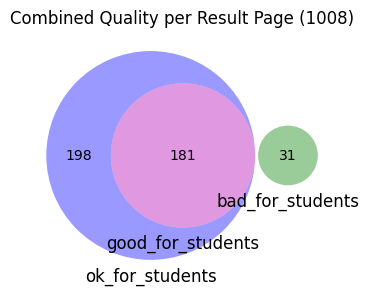

In [34]:
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

columns = ["good_for_students", "bad_for_students", "ok_for_students"]

plt.figure(figsize=(4, 4))
venn3(
    [set(results_sources[results_sources[column]].index) for column in columns],
    set_labels=columns,
)
plt.title(f"Combined Quality per Result Page ({len(results_sources)})")
plt.show()

### Vrije Labels

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '29'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '37'),
 Text(0, 0, '38'),
 Text(0, 0, '38'),
 Text(0, 0, '44'),
 Text(0, 0, '47'),
 Text(0, 0, '53'),
 Text(0, 0, '56'),
 Text(0, 0, '59'),
 Text(0, 0, '64'),
 Text(0, 0, '76'),
 Text(0, 0, '78'),
 Text(0, 0, '82'),
 Text(0, 0, '87'),
 Text(0, 0, '101'),
 Text(0, 0, '136'),
 Text(0, 0, '136'),
 Text(0, 0, '136'),
 Text(0

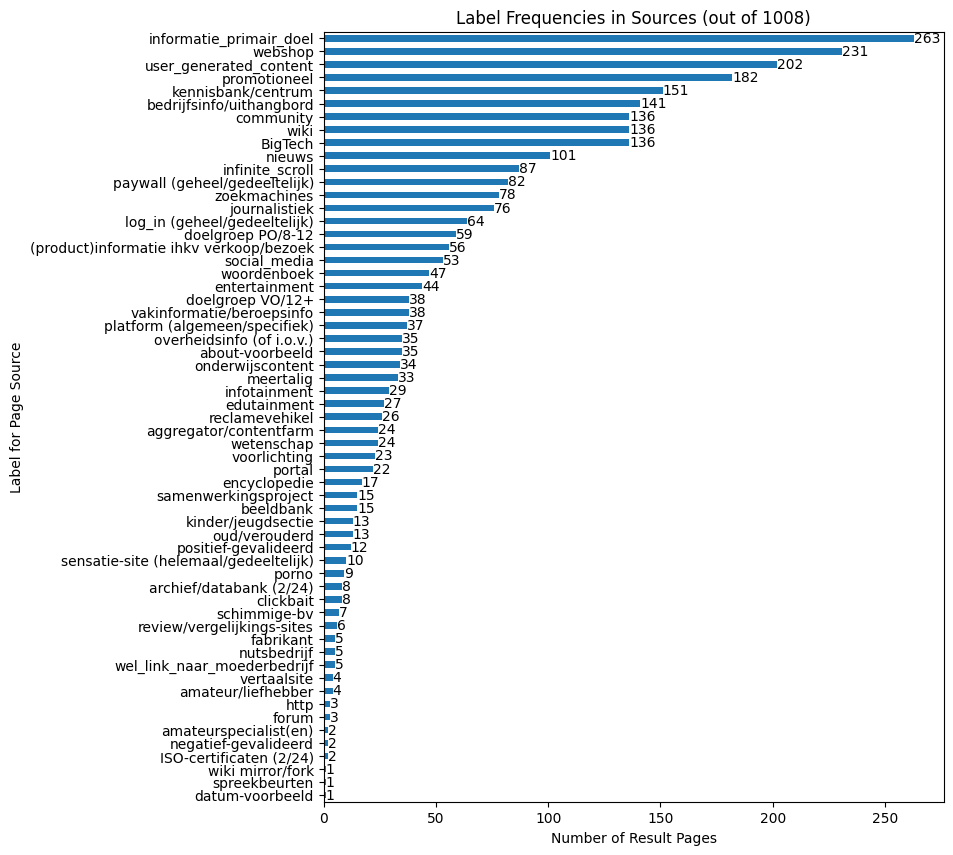

In [35]:
column = "Vrije labels bron/onderwerp"

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel="Label for Page Source",
        figsize=(8, 10),
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '29'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '37'),
 Text(0, 0, '38'),
 Text(0, 0, '38'),
 Text(0, 0, '44'),
 Text(0, 0, '47'),
 Text(0, 0, '53'),
 Text(0, 0, '56'),
 Text(0, 0, '59'),
 Text(0, 0, '64'),
 Text(0, 0, '76'),
 Text(0, 0, '78'),
 Text(0, 0, '82'),
 Text(0, 0, '87'),
 Text(0, 0, '101'),
 Text(0, 0, '136'),
 Text(0, 0, '136'),
 Text(0, 0, '136'),
 Text(0, 0, '141'),
 Text(0, 0, '151'),
 Text(0, 0, '182'),
 Text(0, 0, '202'),
 Text(0, 0, '231'),
 Text(0, 0, '263')]

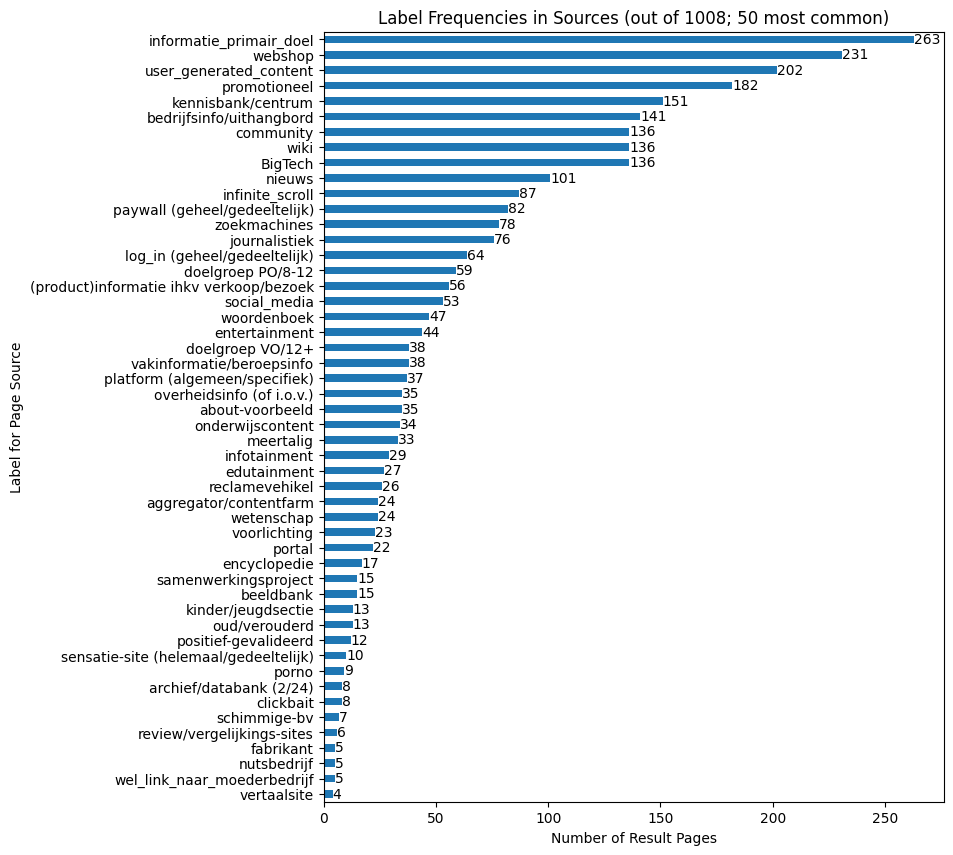

In [36]:
k = 50

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(results_sources)}; {k} most common)",
        xlabel="Number of Result Pages",
        ylabel="Label for Page Source",
        figsize=(8, 10),
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '101'),
 Text(0, 0, '136'),
 Text(0, 0, '136'),
 Text(0, 0, '136'),
 Text(0, 0, '141'),
 Text(0, 0, '151'),
 Text(0, 0, '182'),
 Text(0, 0, '202'),
 Text(0, 0, '231'),
 Text(0, 0, '263')]

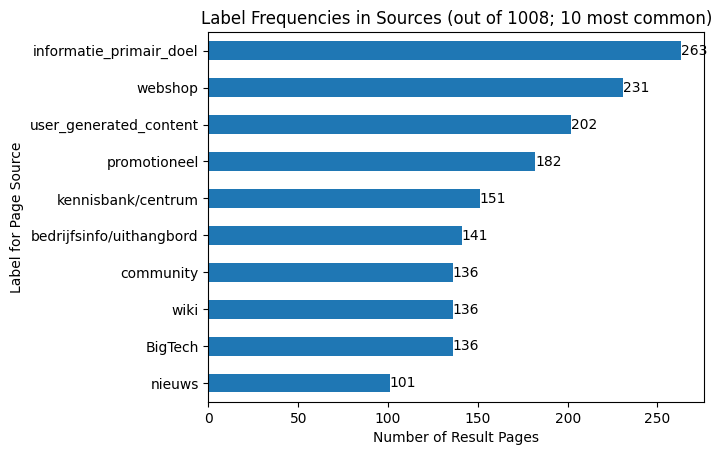

In [37]:
k = 10

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(results_sources)}; {k} most common)",
        xlabel="Number of Result Pages",
        ylabel="Label for Page Source",
    )
)

ax.bar_label(ax.containers[0])

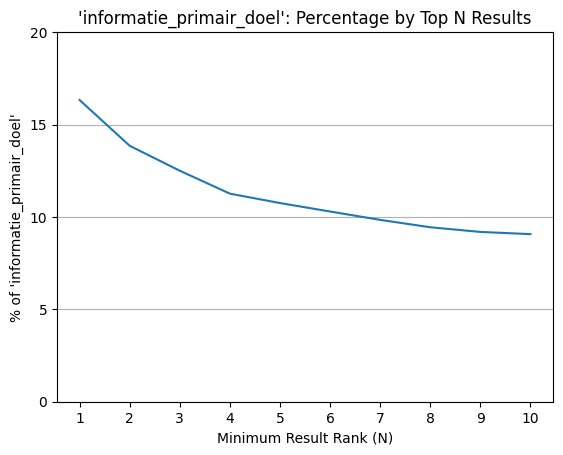

In [38]:
counts: dict[int, float] = {}
category = "informatie_primair_doel"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[category]
        * 100
    )

pd.DataFrame(counts.items(), columns=["Ranking", category]).set_index("Ranking").plot(
    title=f"'{category}': Percentage by Top N Results",
    xlabel="Minimum Result Rank (N)",
    ylabel=f"% of '{category}'",
    xticks=range(1, 11),
    yticks=range(0, 25, 5),
    legend=False,
).grid(axis="y")

### Result Sources

[Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0

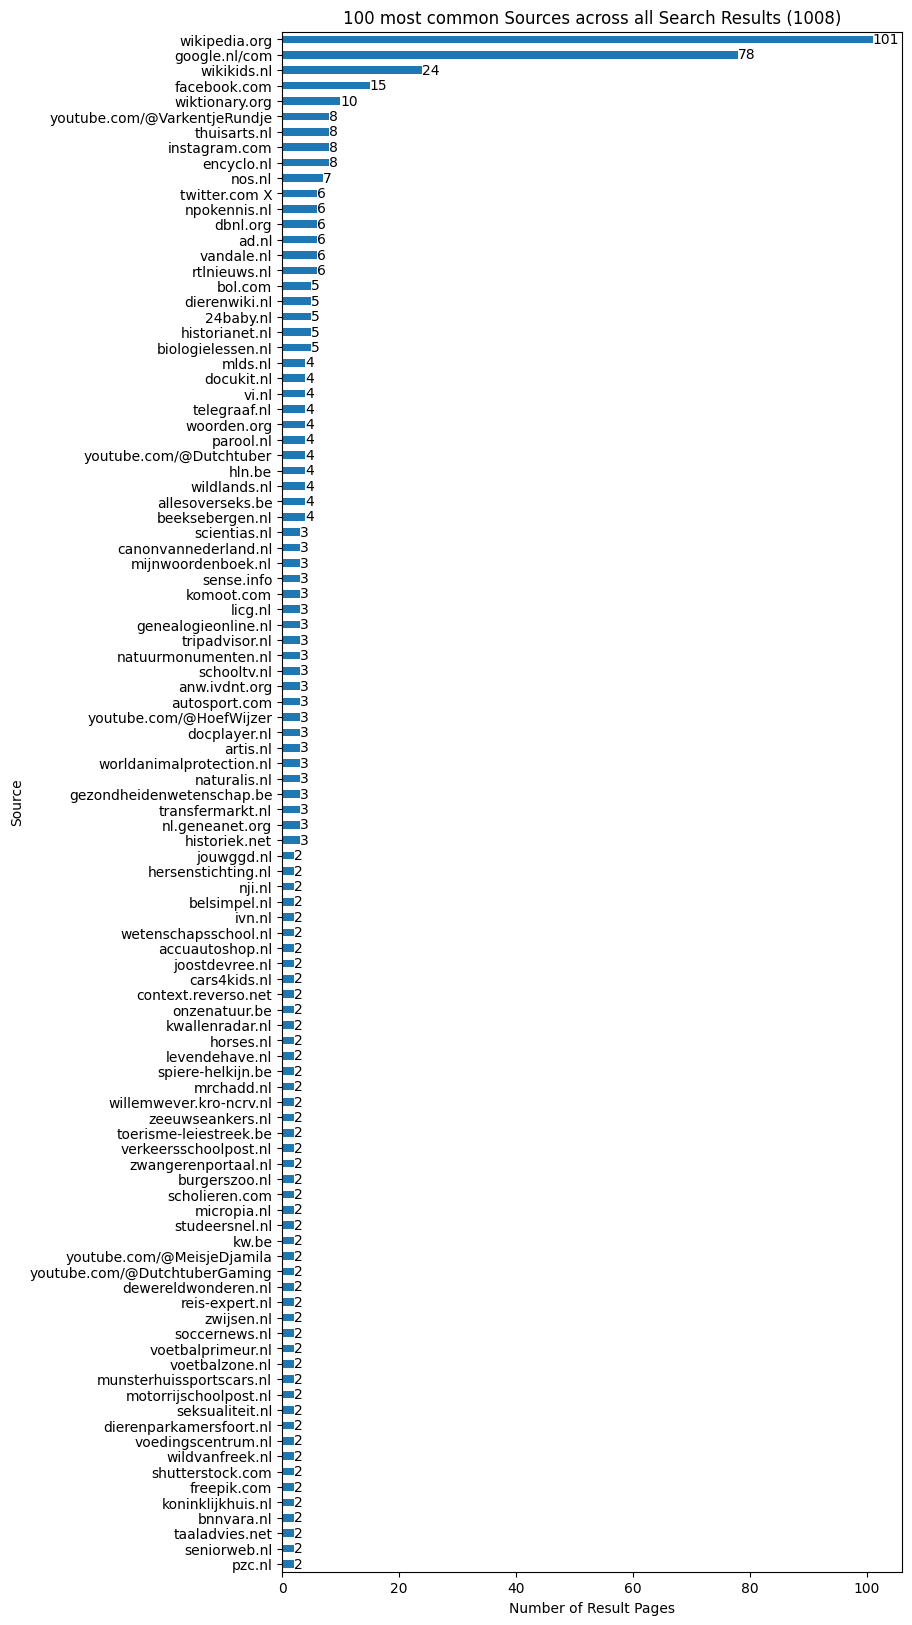

In [39]:
k = 100

ax = (
    results["Bronnen DB"]
    .value_counts(ascending=True)
    .filter(regex="^[^*]")[-k:]  # Filter out groups (marked with *)
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across all Search Results ({len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '15'),
 Text(0, 0, '24'),
 Text(0, 0, '78'),
 Text(0, 0, '101')]

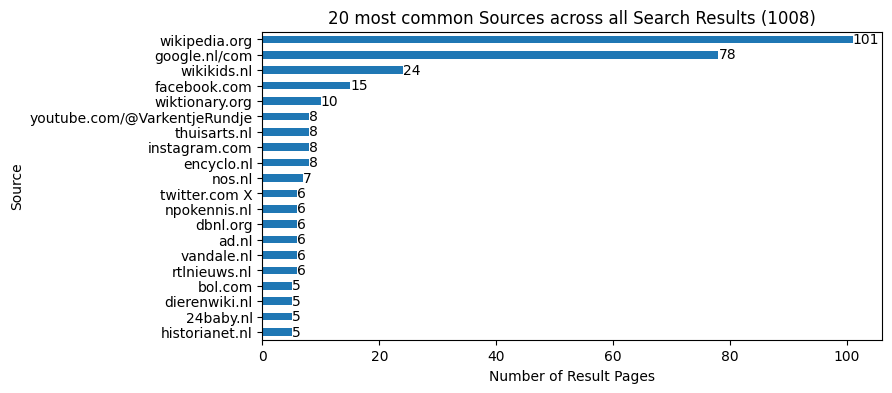

In [40]:
k = 20

ax = (
    results["Bronnen DB"]
    .value_counts(ascending=True)
    .filter(regex="^[^*]")[-k:]  # Filter out groups (marked with *)
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across all Search Results ({len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '10'),
 Text(0, 0, '15'),
 Text(0, 0, '24'),
 Text(0, 0, '78'),
 Text(0, 0, '101')]

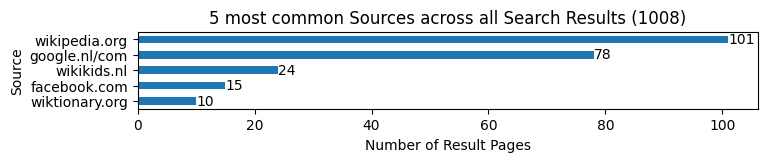

In [41]:
k = 5

ax = (
    results["Bronnen DB"]
    .value_counts(ascending=True)
    .filter(regex="^[^*]")[-k:]  # Filter out groups (marked with *)
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across all Search Results ({len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '10'),
 Text(0, 0, '54'),
 Text(0, 0, '85')]

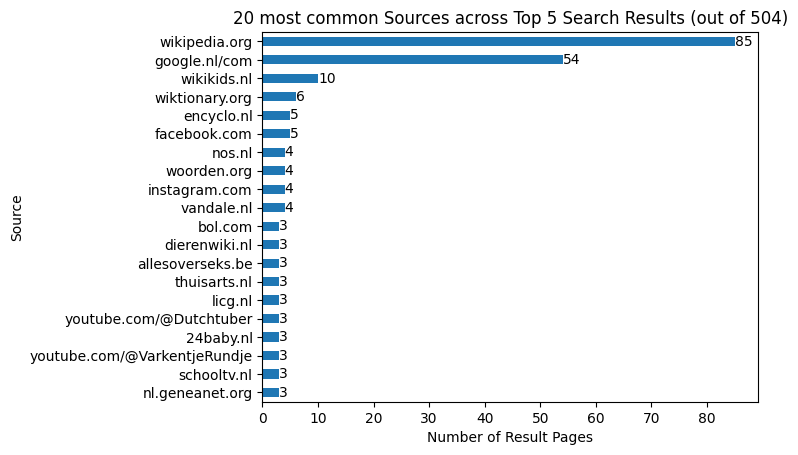

In [42]:
n = 5
_results = results.loc[results["Ranking"] <= n]
k = 20

ax = (
    _results["Bronnen DB"]
    .value_counts(ascending=True)
    .filter(regex="^[^*]")[-k:]  # Filter out groups (marked with *)
    .plot(
        kind="barh",
        # figsize=(8, k // 5),
        title=f"{k} most common Sources across Top {n} Search Results (out of {len(_results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '38')]

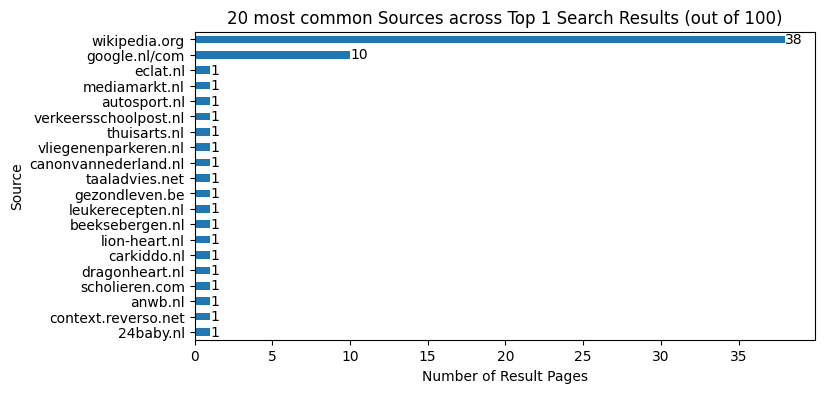

In [43]:
n = 1
_results = results.loc[results["Ranking"] <= n]
k = 20

ax = (
    _results["Bronnen DB"]
    .value_counts()
    .filter(regex="^[^*]")[:k]  # Filter out groups (marked with *)
    .sort_values(ascending=True)
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across Top {n} Search Results (out of {len(_results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '38')]

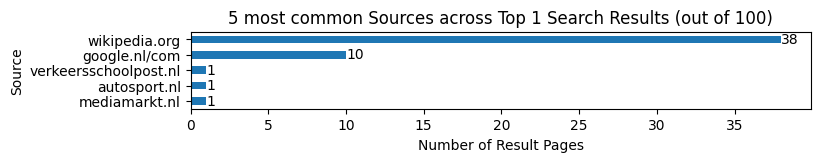

In [44]:
n = 1
_results = results.loc[results["Ranking"] <= n]
k = 5

ax = (
    _results["Bronnen DB"]
    .value_counts()
    .filter(regex="^[^*]")[:k]  # Filter out groups (marked with *)
    .sort_values(ascending=True)
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across Top {n} Search Results (out of {len(_results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

In [45]:
# wikikids.nl results never appears on first rank:

results.loc[(results["Bronnen DB"] == ("wikikids.nl")) & (results["Ranking"] <= 1)]

Empty DataFrame
Columns: [Bron: Thumbs up?, Titel resultaat, Link/resultaat, Query, Ranking, Bronnen DB, Bronnen: URL domein, Bron: Inst/Bedrijf, Toegankelijkheid doelgroep (indruk), Relevant?, vrije tags page, Soort Resultaat, Opmerking, OnderzoekNr, Bron: Commerciality, Created by, Bron-Status, Bron: Vrije labels, Bron: Sector, Ranking vrije labels, Bron: doel, Related to Bronnen DB test (Resultaten DB), Query: Video Schooltv, Bron: reclame]
Index: []

[0 rows x 24 columns]

[Text(0, 0, '1'), Text(0, 0, '12'), Text(0, 0, '23'), Text(0, 0, '26')]

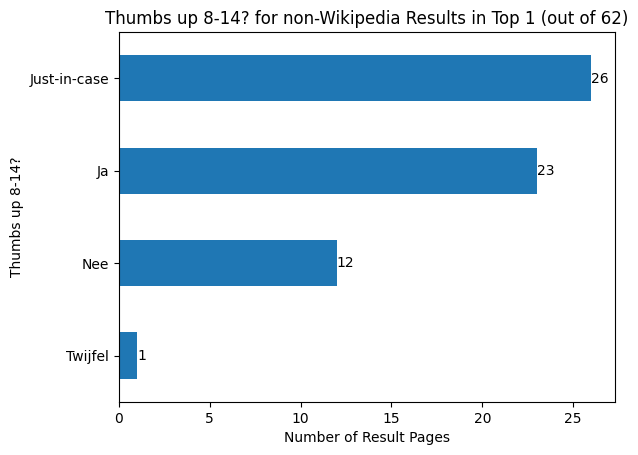

In [46]:
niet_wikipedia_rank_1 = results_sources.loc[
    (results["Bronnen DB"] != ("wikipedia.org")) & (results["Ranking"] <= 1)
]
ax = (
    niet_wikipedia_rank_1["Thumbs up 8-14?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Thumbs up 8-14? for non-Wikipedia Results in Top 1 (out of {len(niet_wikipedia_rank_1)})",
        xlabel="Number of Result Pages",
    )
)
ax.bar_label(ax.containers[0])

### Result Types (Informativeness)

[Text(0, 0, '141'), Text(0, 0, '170'), Text(0, 0, '697')]

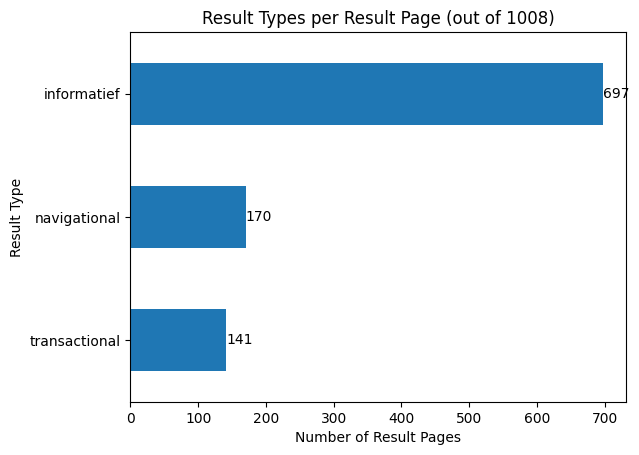

In [47]:
column = "Soort Resultaat"

ax = (
    results[column]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Result Types per Result Page (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Result Type",
    )
)
ax.bar_label(ax.containers[0])

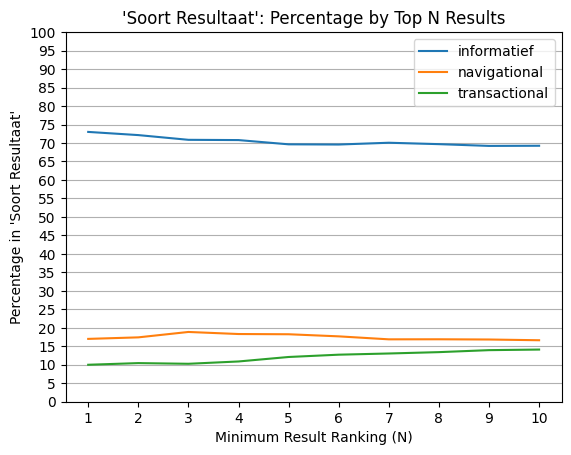

In [48]:
value_counts: dict = {}


for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 105, 5),
    legend=True,
).grid(axis="y")

### Result Relevance

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '12'),
 Text(0, 0, '122'),
 Text(0, 0, '841')]

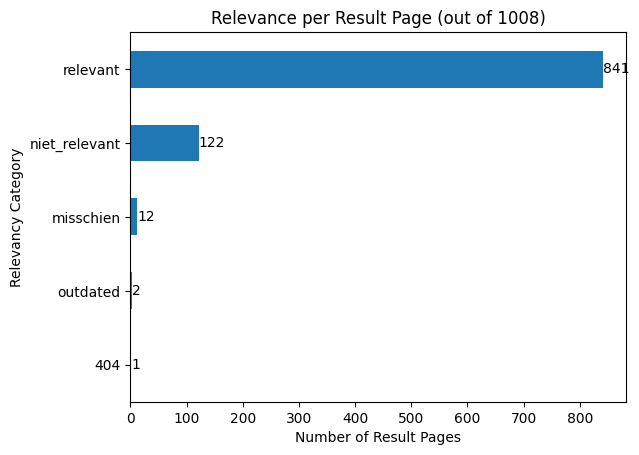

In [49]:
ax = (
    results["Relevant?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Relevance per Result Page (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Relevancy Category",
    )
)
ax.bar_label(ax.containers[0])

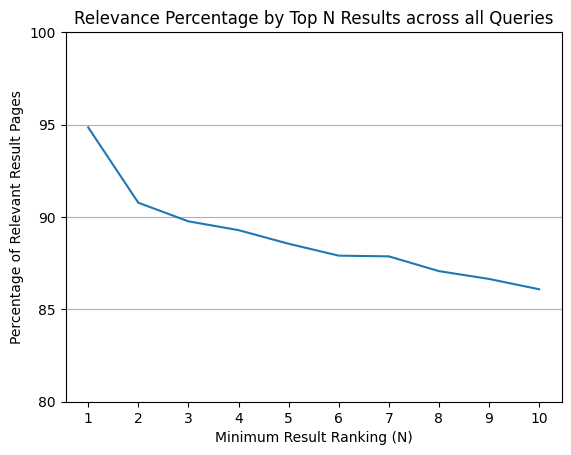

In [50]:
counts: dict[int, float] = {}

for n in range(1, 11):
    _results = results.loc[results["Ranking"] <= n]
    counts[n] = _results["Relevant?"].value_counts(normalize=True)["relevant"] * 100

pd.DataFrame(counts.items(), columns=["Ranking", "Relevance"]).set_index(
    "Ranking"
).plot(
    title="Relevance Percentage by Top N Results across all Queries",
    xlabel="Minimum Result Ranking (N)",
    ylabel="Percentage of Relevant Result Pages",
    xticks=range(1, 11),
    yticks=range(80, 105, 5),
    legend=False,
).grid(axis="y")

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_15830/1192633478.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.DataFrame.from_dict(value_counts, orient="index").fillna(


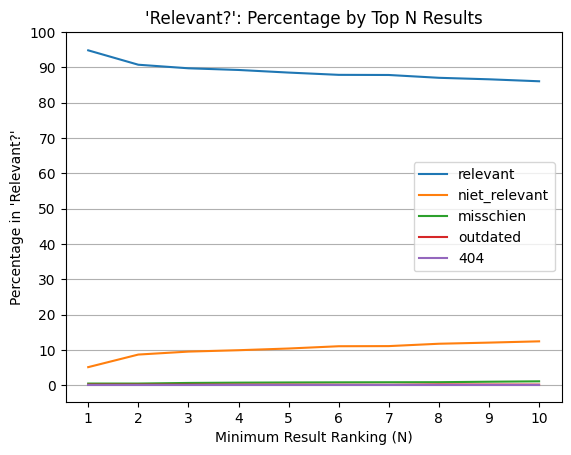

In [51]:
value_counts: dict = {}

column = "Relevant?"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[:k]
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").fillna(
    method="bfill"
).sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 101, 10),
    legend=True,
).grid(axis="y")

### Result Accessibility

[Text(0, 0, '1'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '61'),
 Text(0, 0, '294'),
 Text(0, 0, '300'),
 Text(0, 0, '334')]

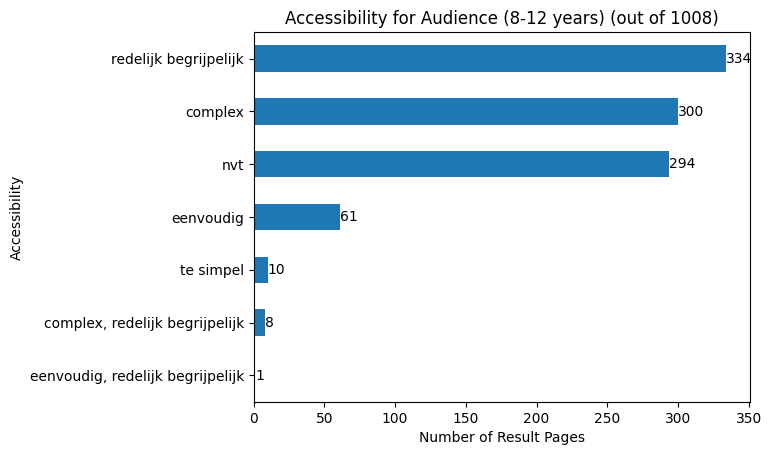

In [52]:
ax = (
    results["Toegankelijkheid doelgroep (indruk)"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Accessibility for Audience (8-12 years) (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Accessibility",
    )
)
ax.bar_label(ax.containers[0])

### Results Commerciality

[Text(0, 0, '51'), Text(0, 0, '410'), Text(0, 0, '547')]

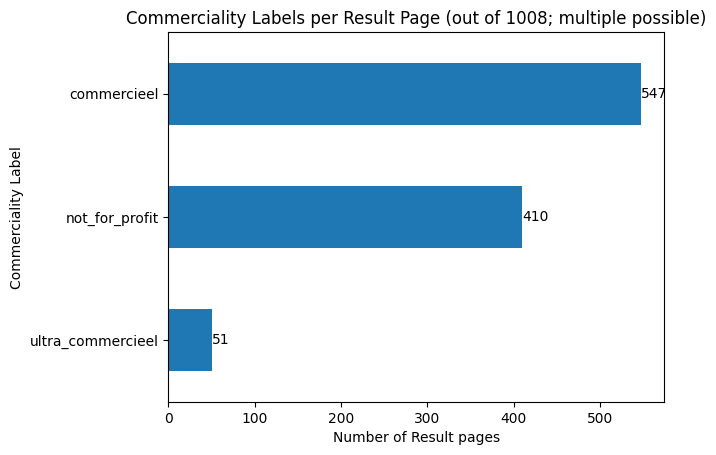

In [53]:
ax = (
    results_sources["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality Labels per Result Page (out of {len(results_sources)}; multiple possible)",
        xlabel="Number of Result pages",
        ylabel="Commerciality Label",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '18'), Text(0, 0, '228'), Text(0, 0, '258')]

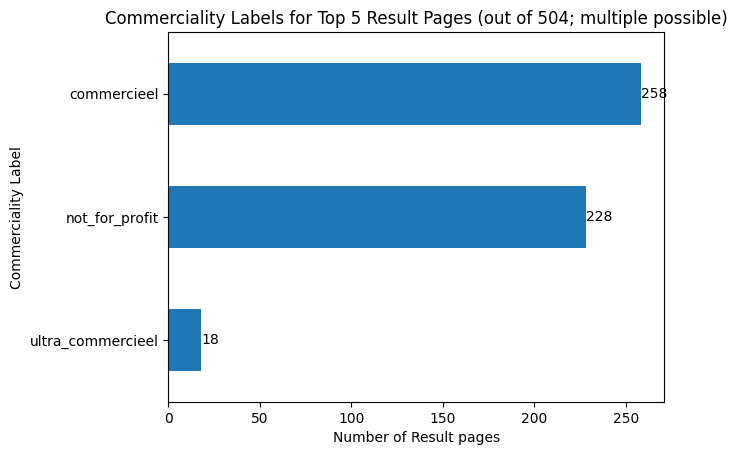

In [54]:
n = 5
_results = results_sources.loc[results["Ranking"] <= n]

ax = (
    _results["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality Labels for Top {n} Result Pages (out of {len(_results)}; multiple possible)",
        xlabel="Number of Result pages",
        ylabel="Commerciality Label",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'), Text(0, 0, '36'), Text(0, 0, '63')]

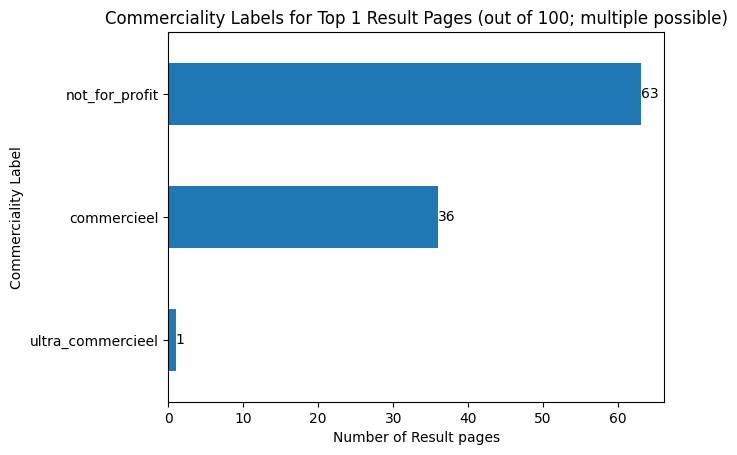

In [55]:
n = 1
_results = results_sources.loc[results["Ranking"] <= n]

ax = (
    _results["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality Labels for Top {n} Result Pages (out of {len(_results)}; multiple possible)",
        xlabel="Number of Result pages",
        ylabel="Commerciality Label",
    )
)
ax.bar_label(ax.containers[0])

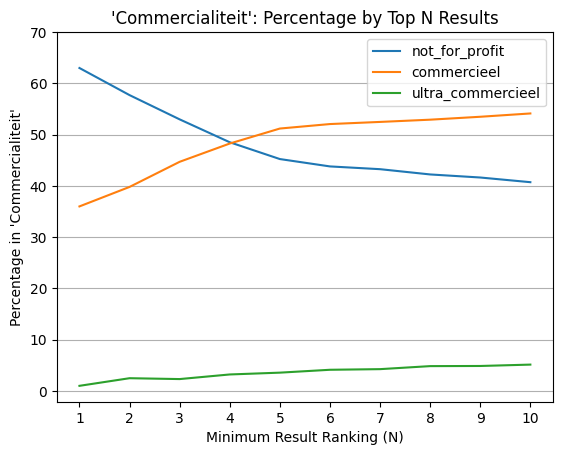

In [56]:
value_counts: dict = {}
column = "Commercialiteit"


for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").fillna(0).sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 75, 10),
    legend=True,
).grid(axis="y")

### Result Sectors

[Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '11'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '18'),
 Text(0, 0, '18'),
 Text(0, 0, '21'),
 Text(0, 0, '25'),
 Text(0, 0, '25'),
 Text(0, 0, '33'),
 Text(0, 0, '35'),
 Text(0, 0, '37'),
 Text(0, 0, '38'),
 Text(0, 0, '75'),
 Text(0, 0, '76'),
 Text(0, 0, '142'),
 Text(0, 0, '167'),
 Text(0, 0, '205')]

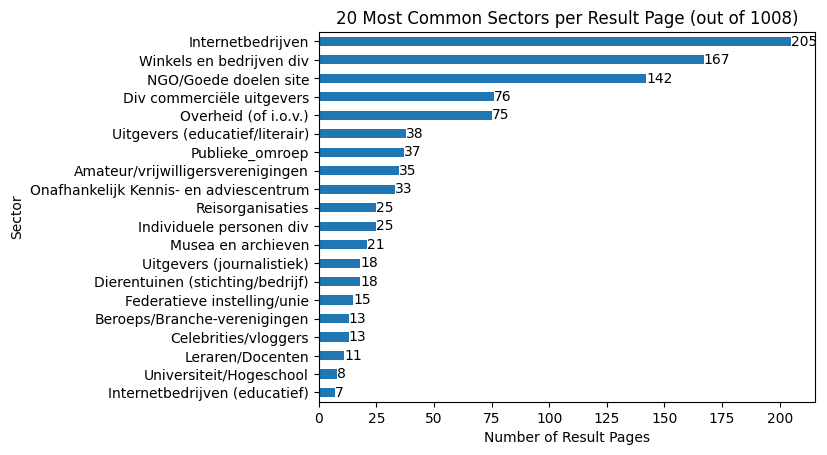

In [57]:
k = 20

ax = (
    results_sources["Sector"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} Most Common Sectors per Result Page (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel="Sector",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '31'),
 Text(0, 0, '31'),
 Text(0, 0, '73'),
 Text(0, 0, '105'),
 Text(0, 0, '108')]

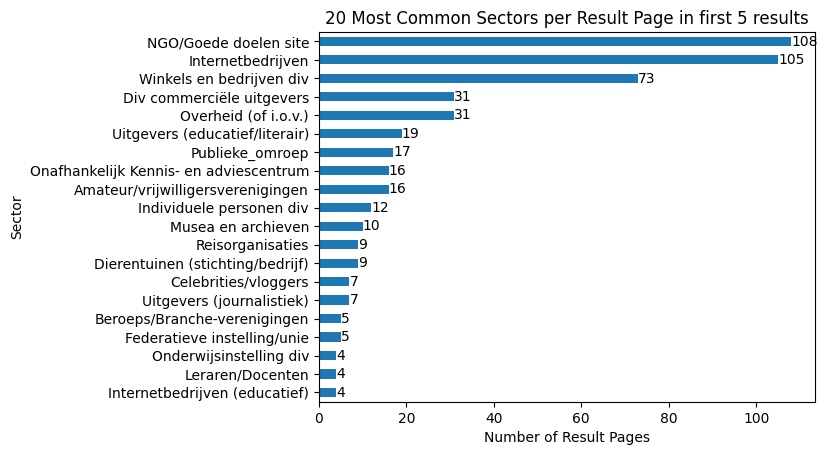

In [58]:
n = 5
k = 20
ax = (
    results_sources.loc[results_sources["Ranking"] <= n]["Sector"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} Most Common Sectors per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel="Sector",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '7'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '42')]

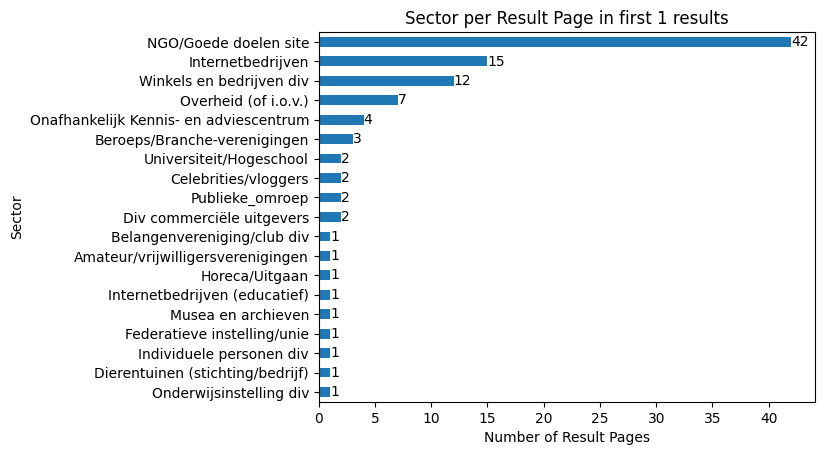

In [59]:
n = 1
ax = (
    results_sources.loc[results_sources["Ranking"] <= n]["Sector"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Sector per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel="Sector",
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_15830/3964544197.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.DataFrame.from_dict(value_counts, orient="index").fillna(


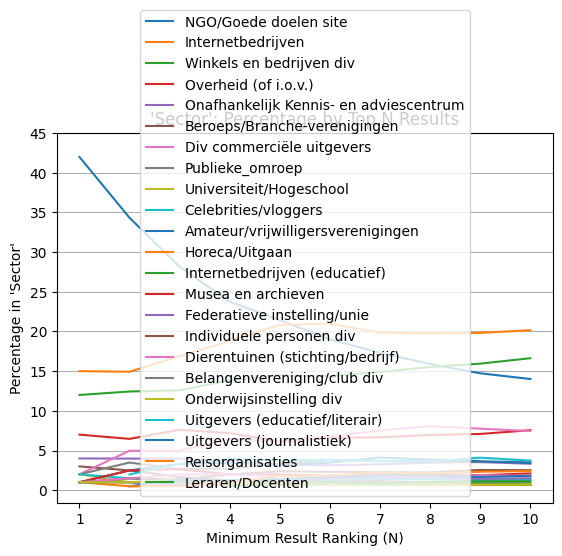

In [60]:
value_counts: dict = {}

column = "Sector"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[:k]
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").fillna(
    method="ffill"
).sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 50, 5),
    legend=True,
).grid(axis="y")

### Thumbs-Up

[Text(0, 0, '29'), Text(0, 0, '238'), Text(0, 0, '358'), Text(0, 0, '383')]

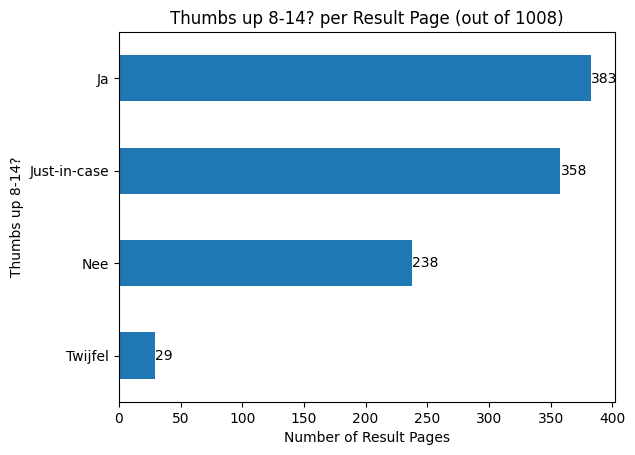

In [61]:
column = "Thumbs up 8-14?"

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per Result Page (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '8'), Text(0, 0, '101'), Text(0, 0, '179'), Text(0, 0, '216')]

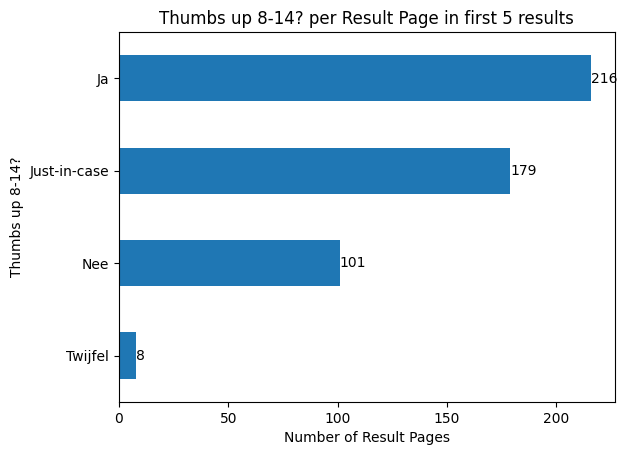

In [62]:
column = "Thumbs up 8-14?"
n = 5

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'), Text(0, 0, '12'), Text(0, 0, '26'), Text(0, 0, '61')]

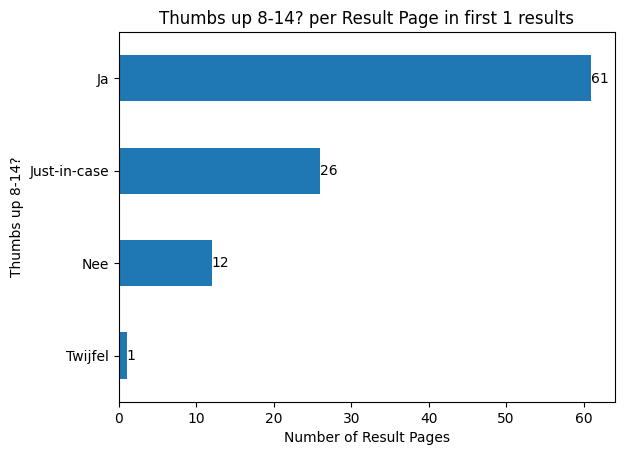

In [63]:
column = "Thumbs up 8-14?"
n = 1

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

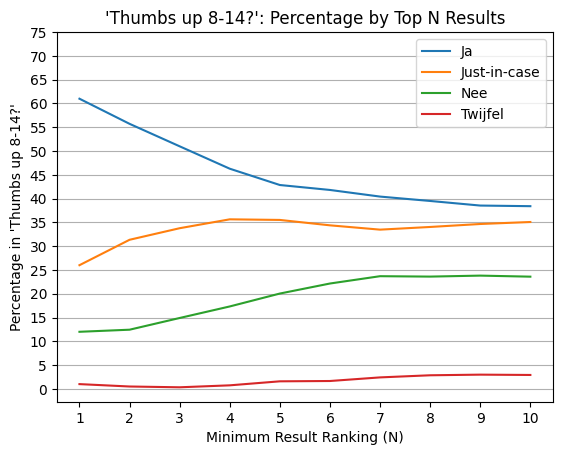

In [64]:
value_counts: dict = {}

categories = ["Ja", "Just-in-case"]
column = "Thumbs up 8-14?"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 80, 5),
    legend=True,
).grid(axis="y")

### Goal

[Text(0, 0, '15'),
 Text(0, 0, '18'),
 Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '29'),
 Text(0, 0, '32'),
 Text(0, 0, '34'),
 Text(0, 0, '41'),
 Text(0, 0, '61'),
 Text(0, 0, '63'),
 Text(0, 0, '67'),
 Text(0, 0, '93'),
 Text(0, 0, '101'),
 Text(0, 0, '113'),
 Text(0, 0, '247')]

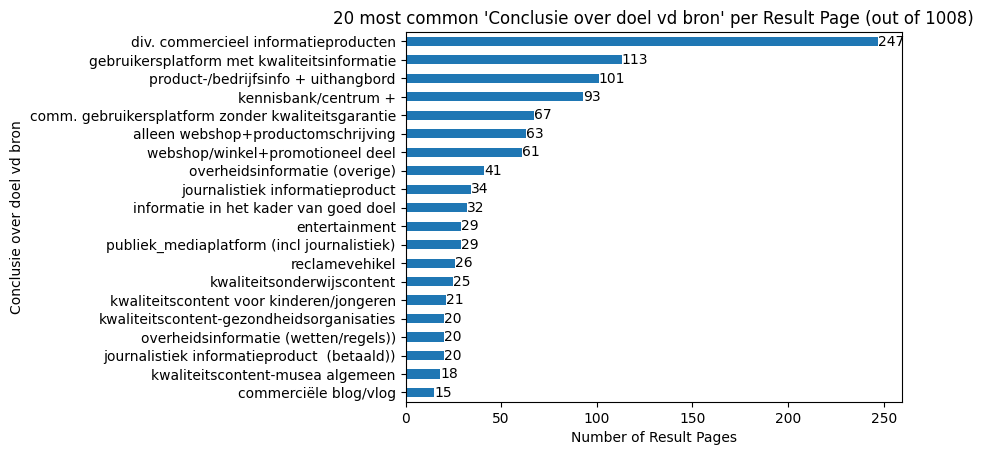

In [65]:
column = "Conclusie over doel vd bron"
k = 20

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} most common '{column}' per Result Page (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '25'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '38'),
 Text(0, 0, '46'),
 Text(0, 0, '91'),
 Text(0, 0, '126')]

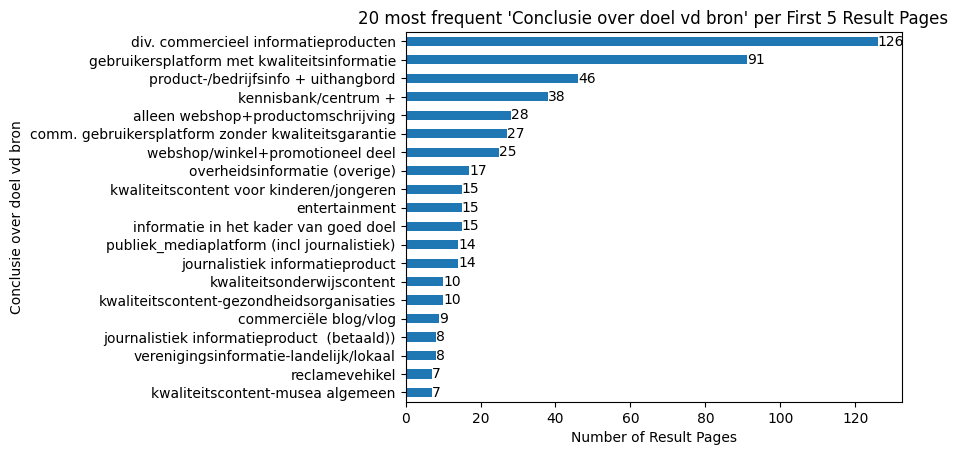

In [66]:
column = "Conclusie over doel vd bron"
n = 5

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} most frequent '{column}' per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '9'),
 Text(0, 0, '17'),
 Text(0, 0, '38')]

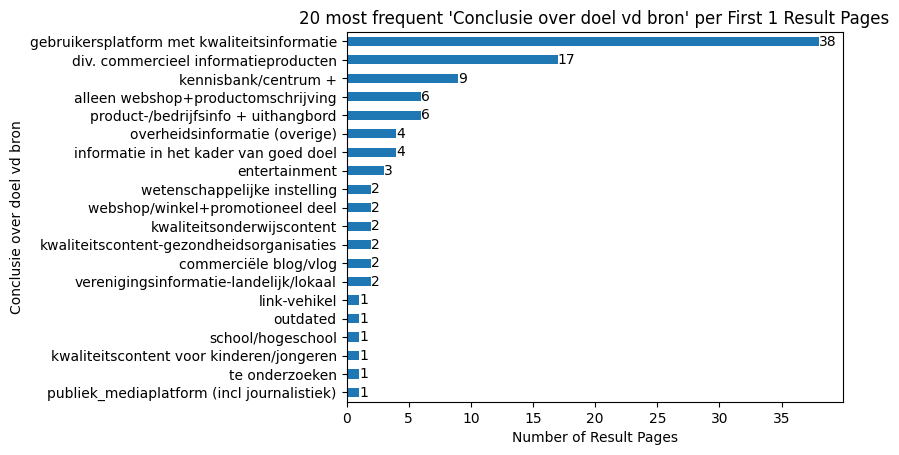

In [67]:
column = "Conclusie over doel vd bron"
n = 1
k = 20

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} most frequent '{column}' per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        # figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

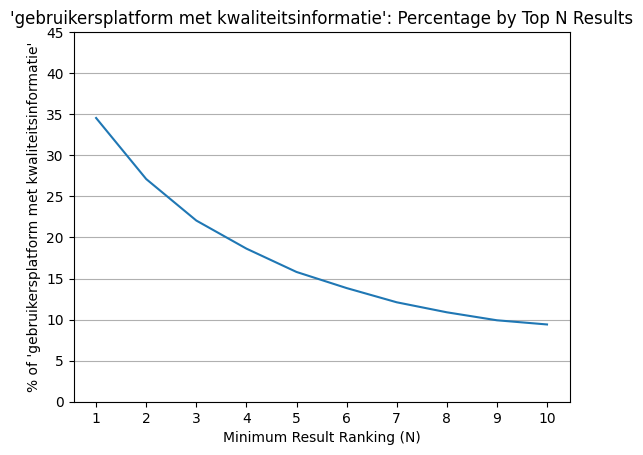

In [68]:
counts: dict[int, float] = {}
category = "gebruikersplatform met kwaliteitsinformatie"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[category]
        * 100
    )

pd.DataFrame(counts.items(), columns=["Ranking", "Thumbs Up"]).set_index(
    "Ranking"
).plot(
    title=f"'{category}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"% of '{category}'",
    xticks=range(1, 11),
    yticks=range(0, 50, 5),
    legend=False,
).grid(axis="y")

### About Page

[Text(0, 0, '1'),
 Text(0, 0, '21'),
 Text(0, 0, '28'),
 Text(0, 0, '53'),
 Text(0, 0, '127'),
 Text(0, 0, '336'),
 Text(0, 0, '426')]

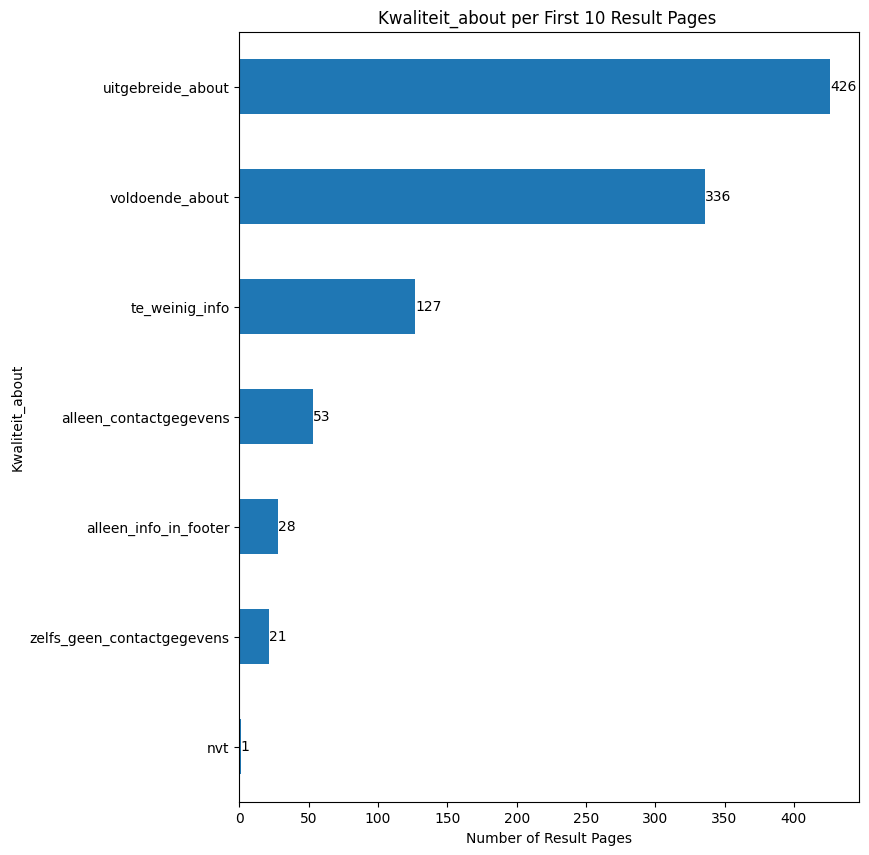

In [69]:
column = "Kwaliteit_about"
n = 10

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages ",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Ads

In [70]:
column = "Reclame"
n = 5

categories = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-n:]
).index
categories

Index(['over_the_top_ads', 'limited_ads', 'many_ads', 'none',
       'company_promotion'],
      dtype='object', name='Reclame')

[Text(0, 0, '42'),
 Text(0, 0, '78'),
 Text(0, 0, '202'),
 Text(0, 0, '359'),
 Text(0, 0, '390')]

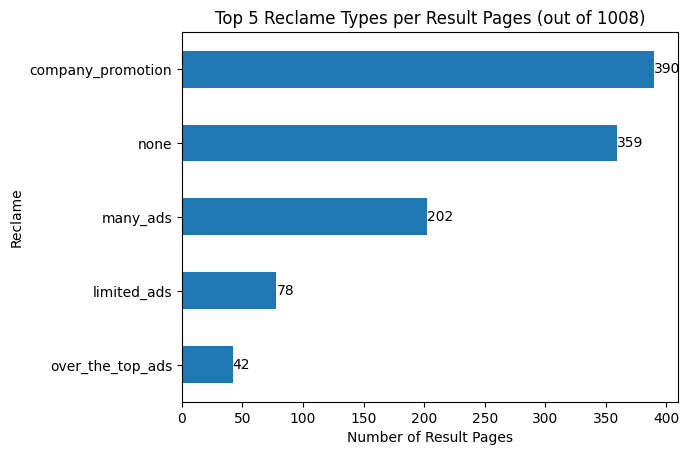

In [71]:
ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[categories]
    .plot(
        kind="barh",
        title=f"Top {n} {column} Types per Result Pages (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_15830/331480954.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.DataFrame.from_dict(value_counts, orient="index").fillna(


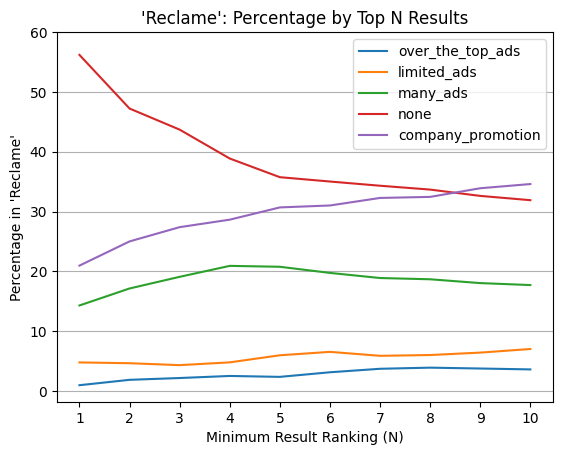

In [72]:
column = "Reclame"
n = 5

value_counts: dict = {}


for rank in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= rank]
    value_counts[rank] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[categories]
        * 100
    )

pd.DataFrame.from_dict(value_counts, orient="index").fillna(
    method="bfill"
).sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 61, 10),
    legend=True,
).grid(axis="y")

[Text(0, 0, '2'),
 Text(0, 0, '10'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '33'),
 Text(0, 0, '115'),
 Text(0, 0, '170'),
 Text(0, 0, '198')]

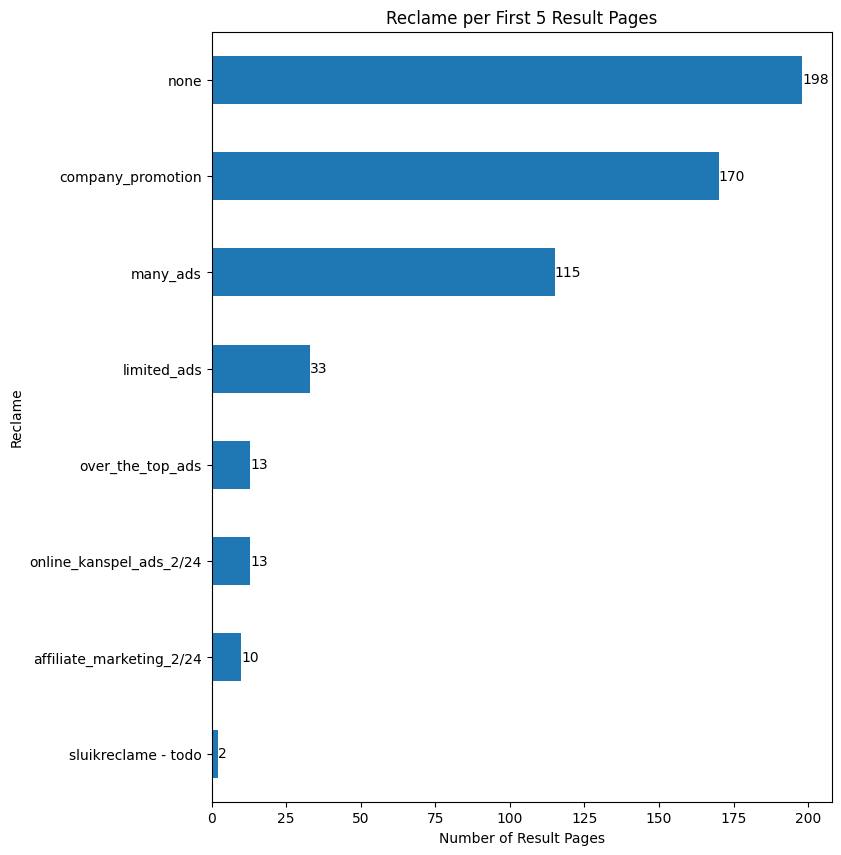

In [73]:
column = "Reclame"
n = 5

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '15'),
 Text(0, 0, '22'),
 Text(0, 0, '59')]

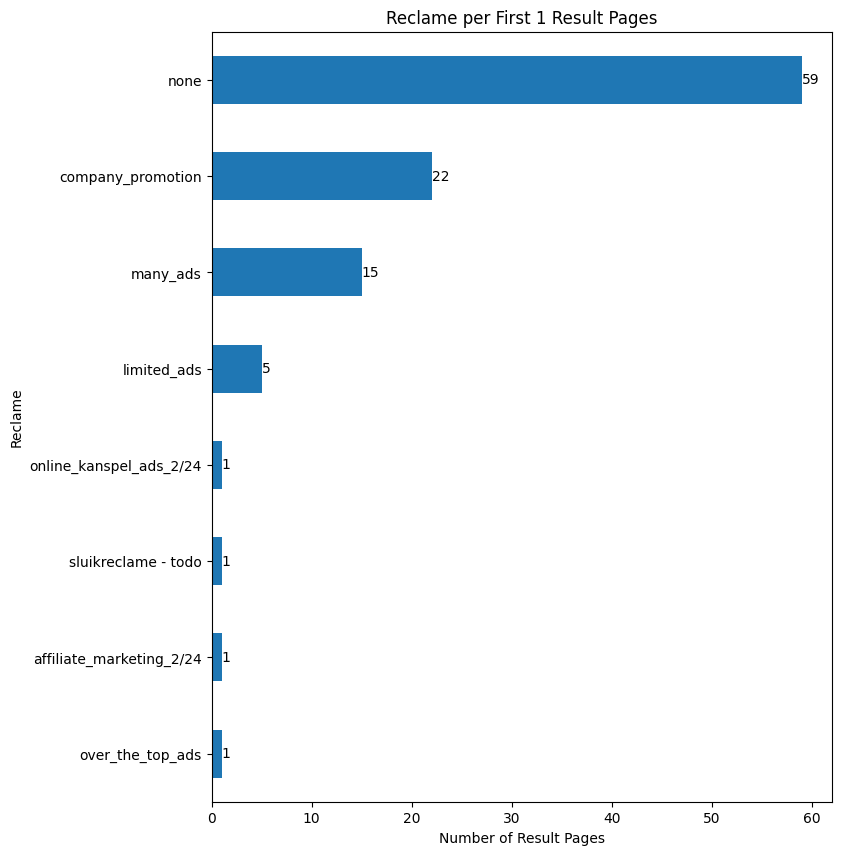

In [74]:
column = "Reclame"
n = 1

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

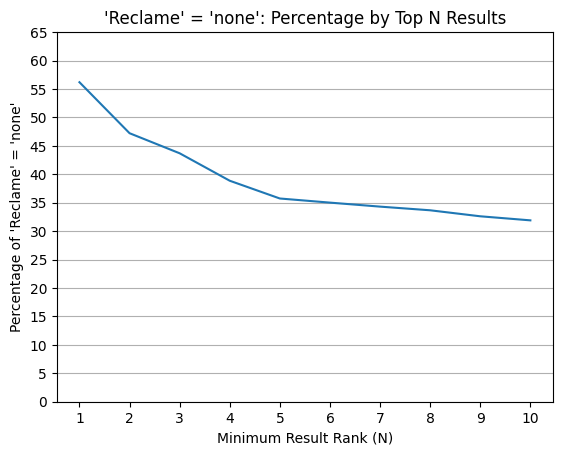

In [75]:
counts: dict[int, float] = {}
category = "none"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[category]
        * 100
    )

pd.DataFrame(counts.items(), columns=["Ranking", category]).set_index("Ranking").plot(
    title=f"'{column}' = '{category}': Percentage by Top N Results",
    xlabel="Minimum Result Rank (N)",
    ylabel=f"Percentage of '{column}' = '{category}'",
    xticks=range(1, 11),
    yticks=range(0, 70, 5),
    legend=False,
).grid(axis="y")

## Sources

### Commerciality

[Text(0, 0, '15'), Text(0, 0, '191'), Text(0, 0, '336')]

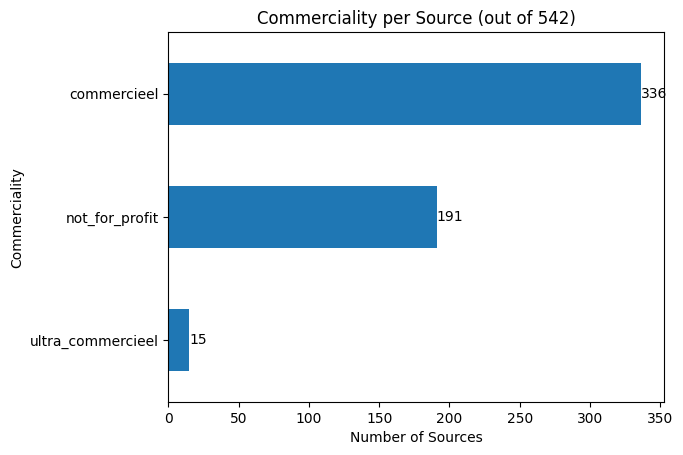

In [76]:
ax = (
    sources["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Commerciality",
    )
)
ax.bar_label(ax.containers[0])

### Sectors

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '23'),
 Text(0, 0, '32'),
 Text(0, 0, '35'),
 Text(0, 0, '55'),
 Text(0, 0, '73'),
 Text(0, 0, '145')]

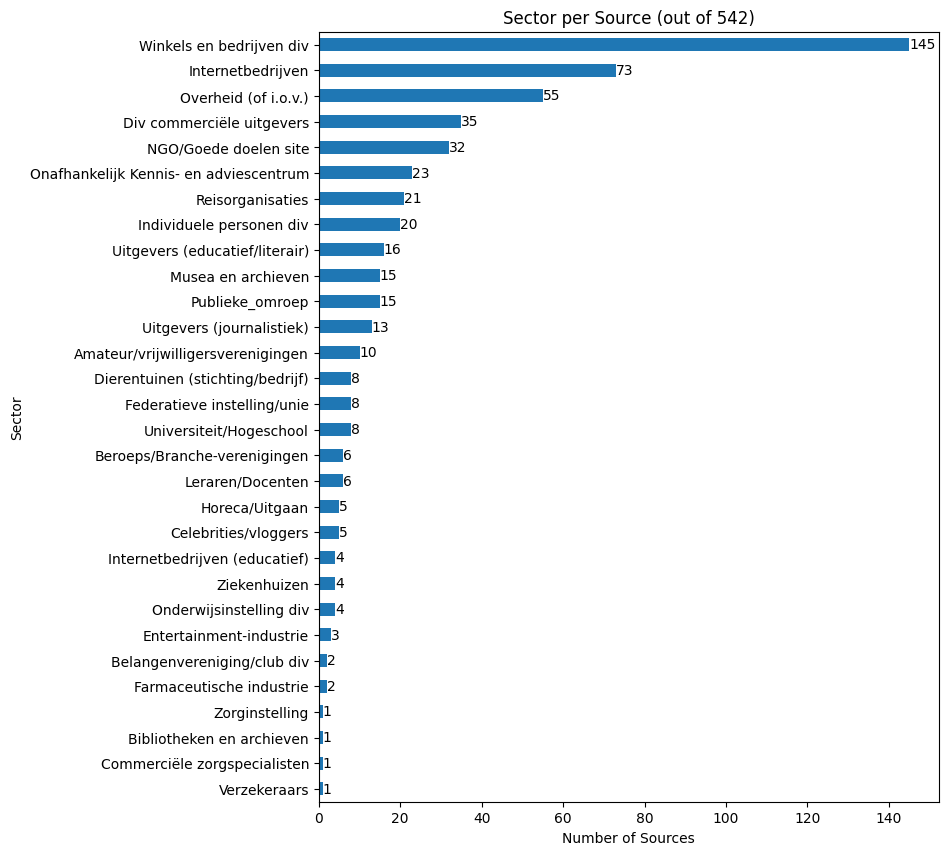

In [77]:
ax = (
    sources["Sector"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Sector per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Sector",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Free Labels

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '24'),
 Text(0, 0, '26'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '30'),
 Text(0, 0, '40'),
 Text(0, 0, '41'),
 Text(0, 0, '45'),
 Text(0, 0, '53'),

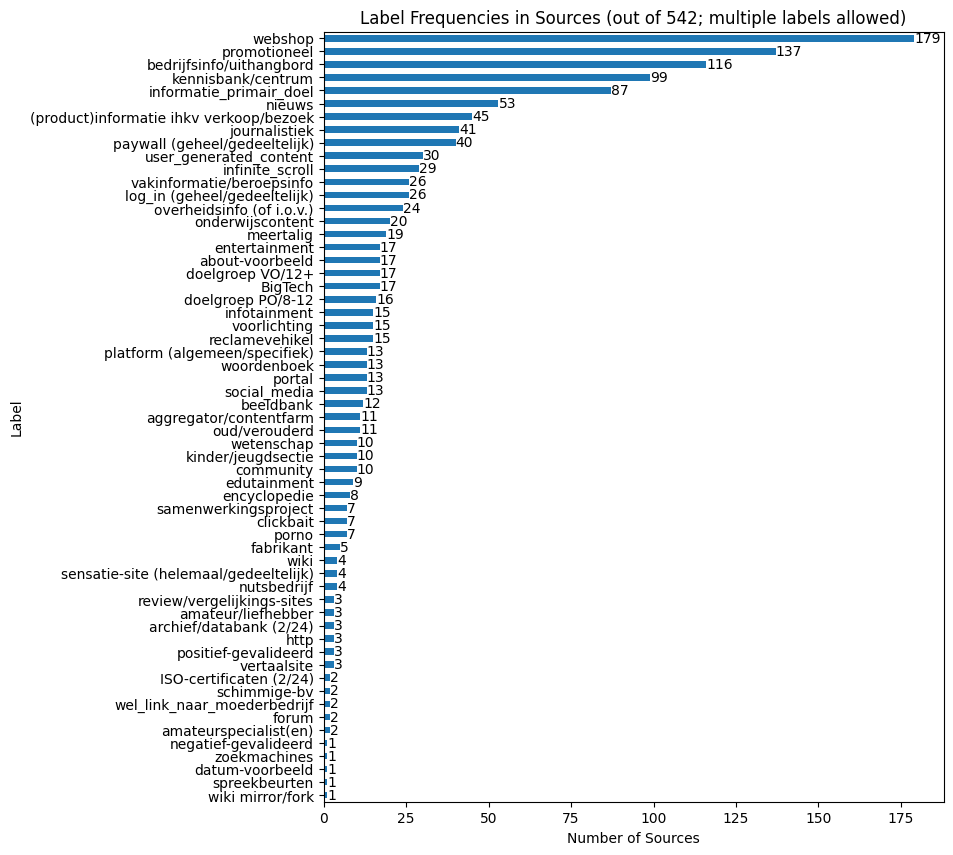

In [78]:
ax = (
    sources["Vrije labels bron/onderwerp"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(sources)}; multiple labels allowed)",
        xlabel="Number of Sources",
        ylabel="Label",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Trackers

<Axes: title={'center': 'Number of Blocked Trackers per Source (out of 542)'}, xlabel='Number of Sources', ylabel='Number of Blocked Trackers'>

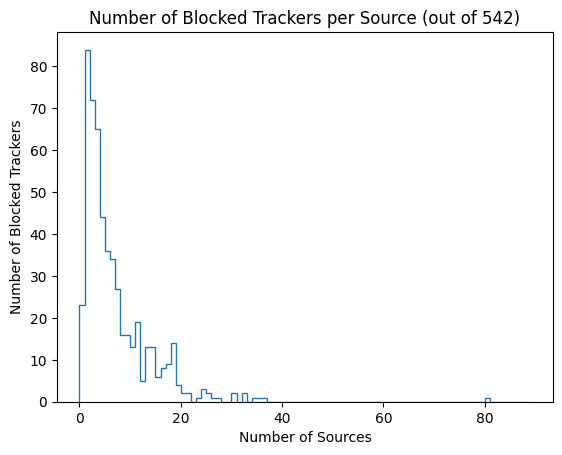

In [79]:
sources["uBlocked trackers"].plot(
    kind="hist",
    histtype="step",
    bins=range(0, 90),
    title=f"Number of Blocked Trackers per Source (out of {len(sources)})",
    ylabel="Number of Blocked Trackers",
    xlabel="Number of Sources",
)

### Ads

[Text(0, 0, '18'),
 Text(0, 0, '287'),
 Text(0, 0, '43'),
 Text(0, 0, '57'),
 Text(0, 0, '162'),
 Text(0, 0, '7'),
 Text(0, 0, '20'),
 Text(0, 0, '6')]

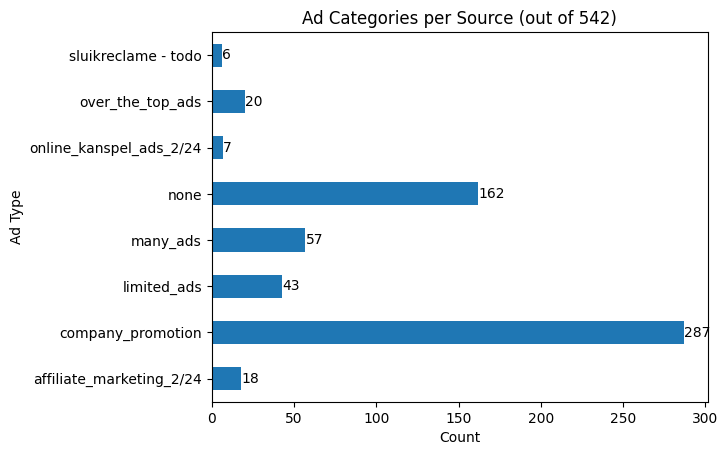

In [80]:
ax = (
    sources["Reclame"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts()
    .sort_index()
    .plot(
        kind="barh",
        title=f"Ad Categories per Source (out of {len(sources)})",
        xlabel="Count",
        ylabel="Ad Type",
    )
)
ax.bar_label(ax.containers[0])

### Goal of Source

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '25'),
 Text(0, 0, '33'),
 Text(0, 0, '54'),
 Text(0, 0, '56'),
 Text(0, 0, '63'),
 Text(0, 0, '83'),
 Text(0, 0, '85')]

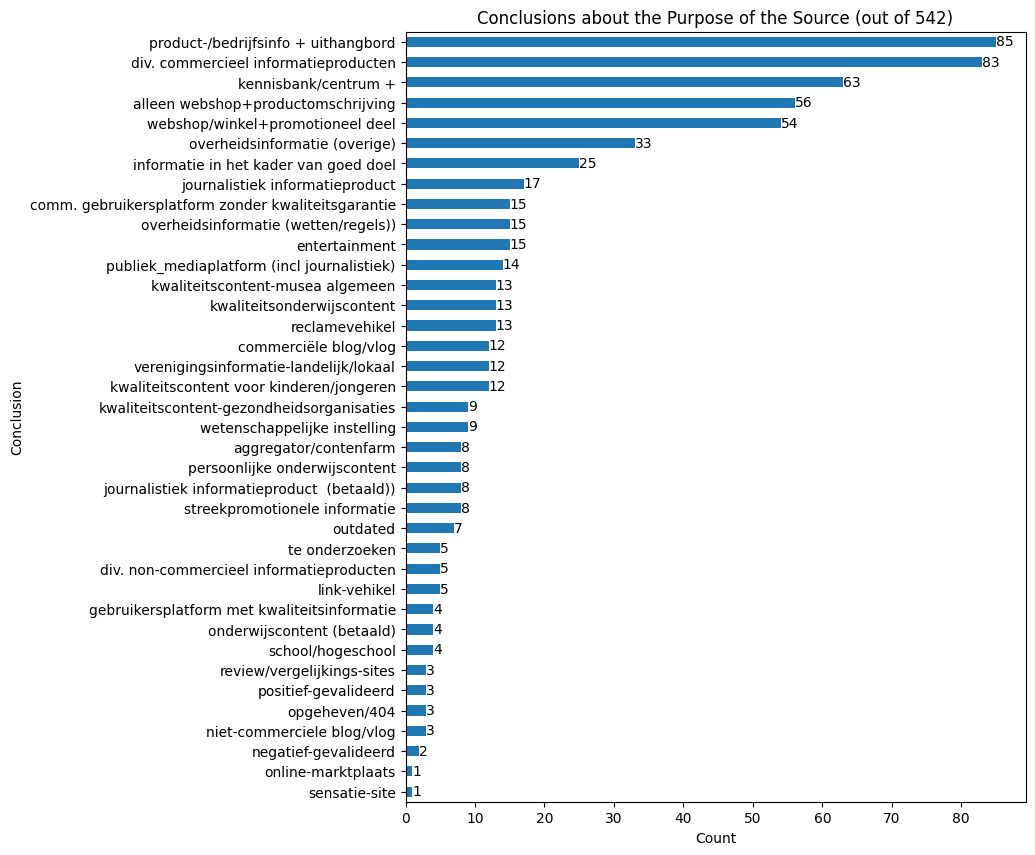

In [81]:
ax = (
    sources["Conclusie over doel vd bron"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Conclusions about the Purpose of the Source (out of {len(sources)})",
        xlabel="Count",
        ylabel="Conclusion",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Source: Thumbs-Up

[Text(0, 0, '20'), Text(0, 0, '166'), Text(0, 0, '176'), Text(0, 0, '180')]

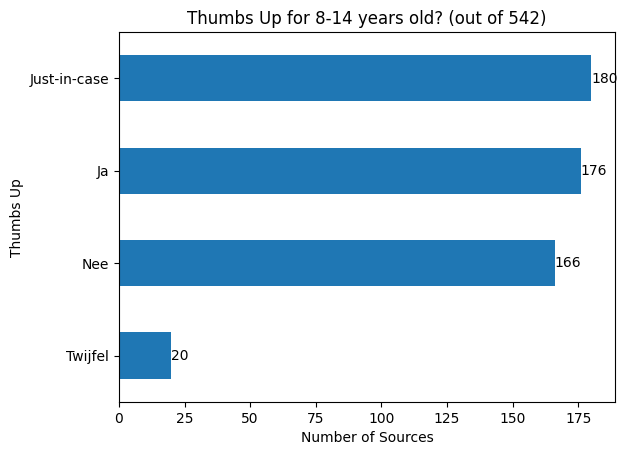

In [82]:
ax = (
    sources["Thumbs up 8-14?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Thumbs Up for 8-14 years old? (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Thumbs Up",
    )
)
ax.bar_label(ax.containers[0])

### About Page

[Text(0, 0, '1'),
 Text(0, 0, '11'),
 Text(0, 0, '14'),
 Text(0, 0, '35'),
 Text(0, 0, '63'),
 Text(0, 0, '204'),
 Text(0, 0, '214')]

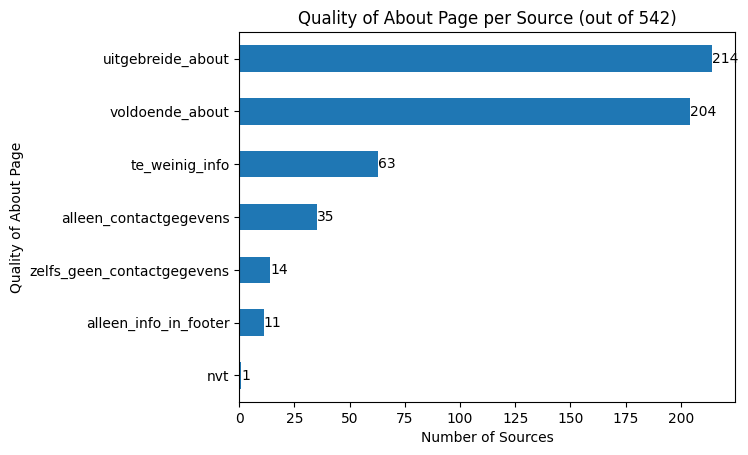

In [83]:
ax = (
    sources["Kwaliteit_about"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Quality of About Page per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Quality of About Page",
    )
)
ax.bar_label(ax.containers[0])

### Doelgroep vs. Thumbs-Up

In [84]:
doelgroep_po = sources.loc[
    (sources["Vrije labels bron/onderwerp"].notna())
    & (sources["Vrije labels bron/onderwerp"].str.contains("doelgroep PO/8-12"))
]
doelgroep_po

URL Domein  \
Name                                                                      
canonvannederland.nl                  https://www.canonvannederland.nl/   
dierenwiki.nl                                    https://dierenwiki.nl/   
dierpedia.nl                                      https://dierpedia.nl/   
docukit.nl                                      https://www.docukit.nl/   
natgeojunior.nl                             https://www.natgeojunior.nl   
rangerclub.be                                     https://rangerclub.be   
rangers.wwf.nl                                  https://rangers.wwf.nl/   
schoolsupport.nl                               https://schoolsupport.nl   
schooltv.nl                                        https://schooltv.nl/   
superspreekbeurt.nl                         https://superspreekbeurt.nl   
taal-oefenen.nl                             https://www.taal-oefenen.nl   
weetwatjeviert.nl                            https://weetwatjeviert.nl/   
wikikids.nl                                        https://wikikids.nl/   
wildvanfreek.nl                             https://www.wildvanfreek.nl   
willemwever.kro-ncrv.nl                https://willemwever.kro-ncrv.nl/   
youtube.com/@VarkentjeRundje  https://www.youtube.com/@VarkentjeRundje/   

                                 Onderwerpen  \
Name                                           
canonvannederland.nl            geschiedenis   
dierenwiki.nl                         dieren   
dierpedia.nl                          dieren   
docukit.nl                               NaN   
natgeojunior.nl                          NaN   
rangerclub.be                 dieren, natuur   
rangers.wwf.nl                dieren, natuur   
schoolsupport.nl                         NaN   
schooltv.nl                              NaN   
superspreekbeurt.nl                      NaN   
taal-oefenen.nl                          NaN   
weetwatjeviert.nl                        NaN   
wikikids.nl                              NaN   
wildvanfreek.nl                       dieren   
willemwever.kro-ncrv.nl                  NaN   
youtube.com/@VarkentjeRundje             NaN   

                                                         Sector  \
Name                                                              
canonvannederland.nl                         Musea en archieven   
dierenwiki.nl                                 Internetbedrijven   
dierpedia.nl                                  Internetbedrijven   
docukit.nl                       Uitgevers (educatief/literair)   
natgeojunior.nl                  Uitgevers (educatief/literair)   
rangerclub.be                    Uitgevers (educatief/literair)   
rangers.wwf.nl                            NGO/Goede doelen site   
schoolsupport.nl                 Uitgevers (educatief/literair)   
schooltv.nl                                     Publieke_omroep   
superspreekbeurt.nl                           Internetbedrijven   
taal-oefenen.nl                  Uitgevers (educatief/literair)   
weetwatjeviert.nl                            Musea en archieven   
wikikids.nl                   Amateur/vrijwilligersverenigingen   
wildvanfreek.nl                  Uitgevers (educatief/literair)   
willemwever.kro-ncrv.nl                         Publieke_omroep   
youtube.com/@VarkentjeRundje                    Publieke_omroep   

                                        Reclame  uBlocked trackers  \
Name                                                                 
canonvannederland.nl                       none                  4   
dierenwiki.nl                          many_ads                  3   
dierpedia.nl                        limited_ads                  7   
docukit.nl                    company_promotion                  1   
natgeojunior.nl               company_promotion                  2   
rangerclub.be                 company_promotion                  5   
rangers.wwf.nl                company_promotion                  3   
schoolsu

In [85]:
doelgroep_vo = sources.loc[
    (sources["Vrije labels bron/onderwerp"].notna())
    & (sources["Vrije labels bron/onderwerp"].str.contains("doelgroep VO/12+"))
]
doelgroep_vo

URL Domein  \
Name                                                                 
aljevragen.nl                            https://www.aljevragen.nl   
allesoverseks.be                     https://www.allesoverseks.be/   
biologielessen.nl                       https://biologielessen.nl/   
canonvannederland.nl             https://www.canonvannederland.nl/   
cyberpoli.nl                             https://www.cyberpoli.nl/   
dierenwiki.nl                               https://dierenwiki.nl/   
dierpedia.nl                                 https://dierpedia.nl/   
examenoverzicht.nl                 https://www.examenoverzicht.nl/   
jouwggd.nl                                 https://www.jouwggd.nl/   
mlochemie.nl                              https://www.mlochemie.nl   
mrchadd.nl                                 https://www.mrchadd.nl/   
schooltv.nl                                   https://schooltv.nl/   
seksualiteit.nl                            https://seksualiteit.nl   
sense.info                                      https://sense.info   
surinamewebquest.nl                http://www.surinamewebquest.nl/   
wetenschapsschool.nl             https://www.wetenschapsschool.nl/   
youtube.com/@WouterRenkema  https://www.youtube.com/@WouterRenkema   

                                    Onderwerpen  \
Name                                              
aljevragen.nl                               NaN   
allesoverseks.be                        lichaam   
biologielessen.nl                       lichaam   
canonvannederland.nl               geschiedenis   
cyberpoli.nl                gezondheid, lichaam   
dierenwiki.nl                            dieren   
dierpedia.nl                             dieren   
examenoverzicht.nl                          NaN   
jouwggd.nl                  gezondheid, lichaam   
mlochemie.nl                                NaN   
mrchadd.nl                                  NaN   
schooltv.nl                                 NaN   
seksualiteit.nl                         lichaam   
sense.info                              lichaam   
surinamewebquest.nl                         NaN   
wetenschapsschool.nl                        NaN   
youtube.com/@WouterRenkema                  NaN   

                                                            Sector  \
Name                                                                 
aljevragen.nl                                     Leraren/Docenten   
allesoverseks.be                              Overheid (of i.o.v.)   
biologielessen.nl                                 Leraren/Docenten   
canonvannederland.nl                            Musea en archieven   
cyberpoli.nl                Onafhankelijk Kennis- en adviescentrum   
dierenwiki.nl                                    Internetbedrijven   
dierpedia.nl                                     Internetbedrijven   
examenoverzicht.nl                               Internetbedrijven   
jouwggd.nl                             Federatieve instelling/unie   
mlochemie.nl                        Uitgevers (educatief/literair)   
mrchadd.nl                           Internetbedrijven (educatief)   
schooltv.nl                                        Publieke_omroep   
seksualiteit.nl             Onafhankelijk Kennis- en adviescentrum   
sense.info                                    Overheid (of i.o.v.)   
surinamewebquest.nl                               Leraren/Docenten   
wetenschapsschool.nl                              Leraren/Docenten   
youtube.com/@WouterRenkema                        Leraren/Docenten   

                                      Reclame  uBlocked trackers  \
Name                                                               
aljevragen.nl                     limited_ads                  7   
allesoverseks.be                         none                  3   
biologielessen.nl                        none                  1   
canonvannederland.nl                     none                  4   
cyberpoli.nl    

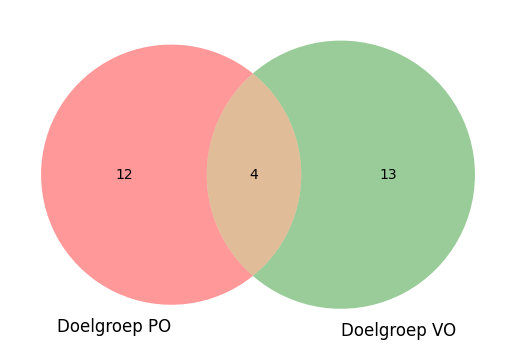

In [86]:
from matplotlib_venn import venn2

venn2(
    [set(doelgroep_po.index), set(doelgroep_vo.index)],
    set_labels=["Doelgroep PO", "Doelgroep VO"],
)

[Text(0, 0, '11'), Text(0, 0, '5')]

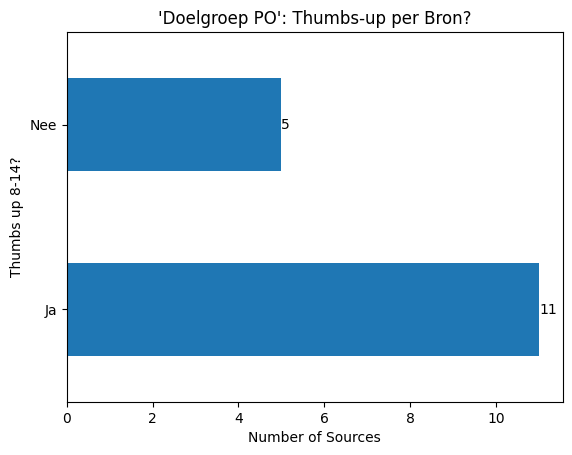

In [87]:
ax = (
    doelgroep_po["Thumbs up 8-14?"]
    .value_counts()
    .plot(
        kind="barh",
        title="'Doelgroep PO': Thumbs-up per Bron?",
        xlabel="Number of Sources",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '13'), Text(0, 0, '2'), Text(0, 0, '2')]

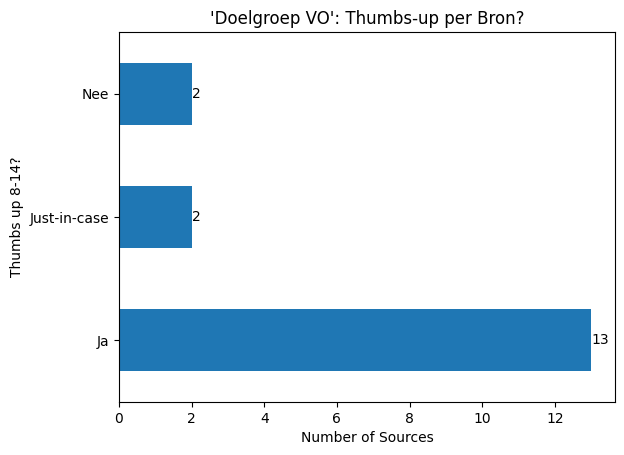

In [88]:
ax = (
    doelgroep_vo["Thumbs up 8-14?"]
    .value_counts()
    .plot(
        kind="barh",
        title="'Doelgroep VO': Thumbs-up per Bron?",
        xlabel="Number of Sources",
    )
)
ax.bar_label(ax.containers[0])

### Top-level domains

In [89]:
sources["tld"] = sources["URL Domein"].str.split(".").str[-1].str.split("/").str[0]
sources["tld"].value_counts()

tld
nl                                 390
com                                 76
be                                  40
org                                 13
net                                  7
nu                                   3
brussels                             2
fr                                   2
n                                    1
gov                                  1
122                                  1
info                                 1
shop                                 1
gent                                 1
redirect                             1
do?ctx=46163,46173&anav=4154073      1
html                                 1
Name: count, dtype: int64

[Text(0, 0, '(128 / 390)'),
 Text(0, 0, '(6 / 76)'),
 Text(0, 0, '(27 / 40)'),
 Text(0, 0, '(7 / 13)'),
 Text(0, 0, '(3 / 7)')]

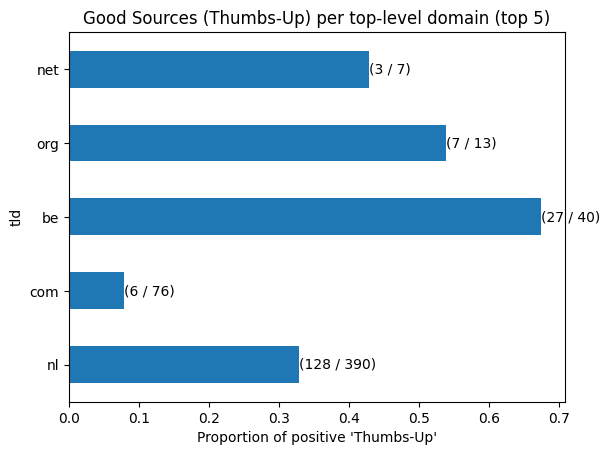

In [90]:
n = 5
tlds = pd.Series(sources["tld"].value_counts()[:n])

ja_counts = pd.Series(
    [
        len(sources.loc[(sources["tld"] == tld) & (sources["Thumbs up 8-14?"] == "Ja")])
        for tld in tlds.index
    ],
    index=tlds.index,
)
ja_counts
ax = (ja_counts / tlds).plot(
    kind="barh",
    title=f"Good Sources (Thumbs-Up) per top-level domain (top {n})",
    xlabel="Proportion of positive 'Thumbs-Up'",
    legend=False,
)

bar_labels = [
    f"({int(ja_counts[tld])} / { sources['tld'].value_counts()[tld]})"
    for tld in tlds.index
]
ax.bar_label(ax.containers[0], labels=bar_labels)

## Queries and Result Pages

### Ok/Good/Bad for Students

[Text(0, 0, '36'),
 Text(0, 0, '20'),
 Text(0, 0, '13'),
 Text(0, 0, '11'),
 Text(0, 0, '2'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '4'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

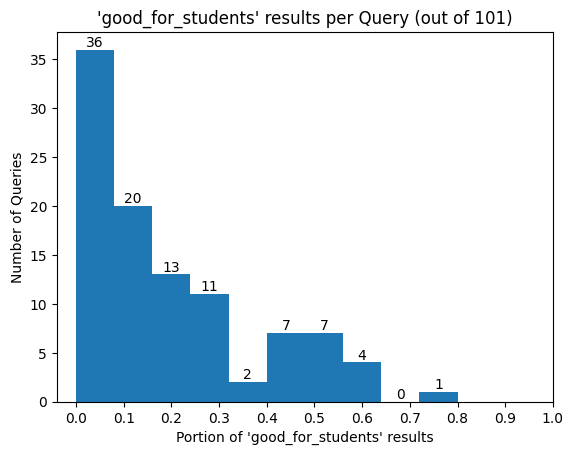

In [91]:
column = "good_for_students"

grouped = results_sources.groupby("Query")
ax = grouped.apply(
    lambda group: group[column].sum() / len(group), include_groups=False
).plot(
    kind="hist",
    bins=10,
    title=f"'{column}' results per Query (out of {len(grouped)})",
    xlabel=f"Portion of '{column}' results",
    ylabel="Number of Queries",
    xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '84'),
 Text(0, 0, '12'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

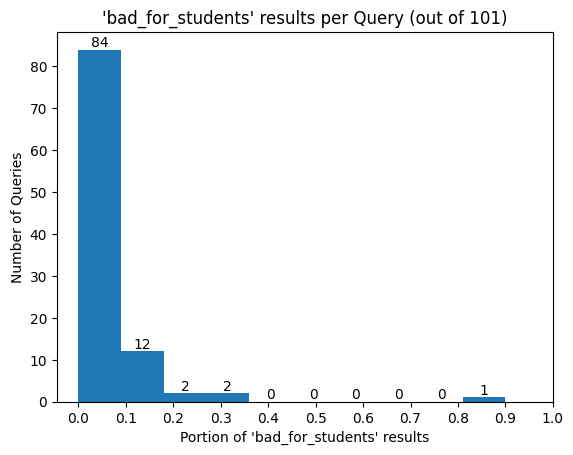

In [92]:
column = "bad_for_students"

grouped = results_sources.groupby("Query")
ax = grouped.apply(
    lambda group: group[column].sum() / len(group), include_groups=False
).plot(
    kind="hist",
    bins=10,
    title=f"'{column}' results per Query (out of {len(grouped)})",
    xlabel=f"Portion of '{column}' results",
    ylabel="Number of Queries",
    xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '13'),
 Text(0, 0, '11'),
 Text(0, 0, '17'),
 Text(0, 0, '10'),
 Text(0, 0, '7'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '14'),
 Text(0, 0, '5'),
 Text(0, 0, '2')]

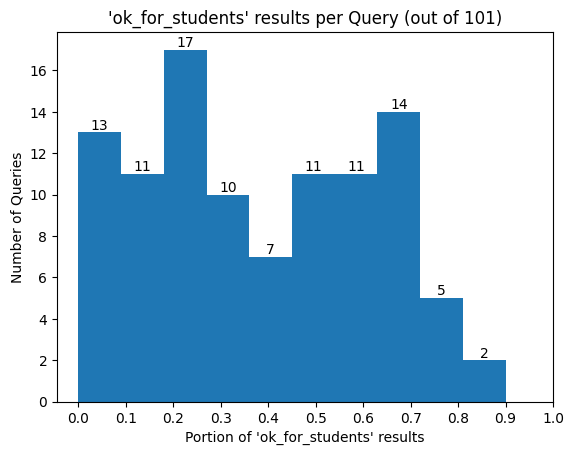

In [93]:
column = "ok_for_students"

grouped = results_sources.groupby("Query")
ax = grouped.apply(
    lambda group: group[column].sum() / len(group), include_groups=False
).plot(
    kind="hist",
    bins=10,
    title=f"'{column}' results per Query (out of {len(grouped)})",
    xlabel=f"Portion of '{column}' results",
    ylabel="Number of Queries",
    xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
)
ax.bar_label(ax.containers[0])

### Soort Resultaten Distribution per Query

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_15830/2519624949.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '7'),
 Text(0, 0, '2'),
 Text(0, 0, '9'),
 Text(0, 0, '12'),
 Text(0, 0, '22'),
 Text(0, 0, '25')]

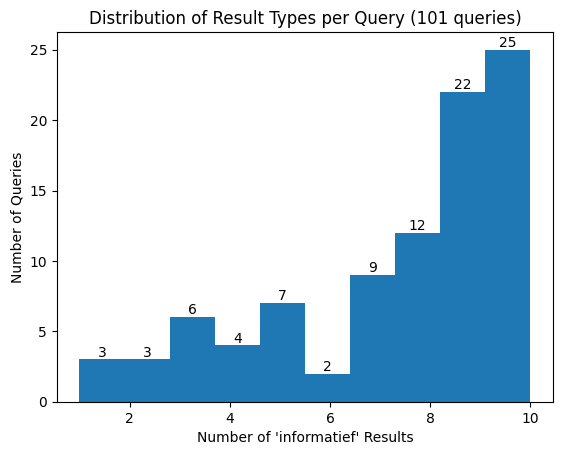

In [94]:
column = "Soort Resultaat"
value = "informatief"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_15830/1416800553.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '10'),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '1')]

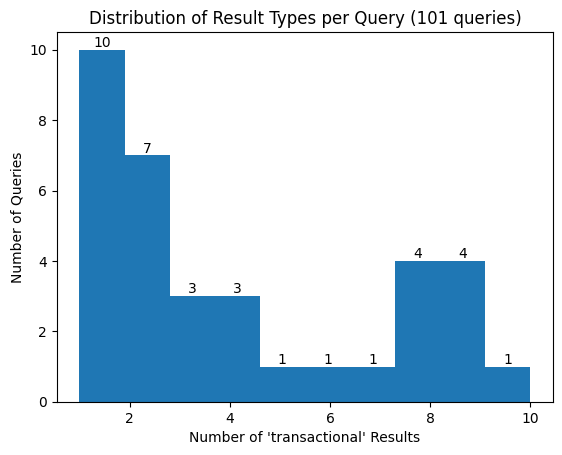

In [95]:
column = "Soort Resultaat"
value = "transactional"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_15830/3201790118.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '29'),
 Text(0, 0, '15'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '7'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '2')]

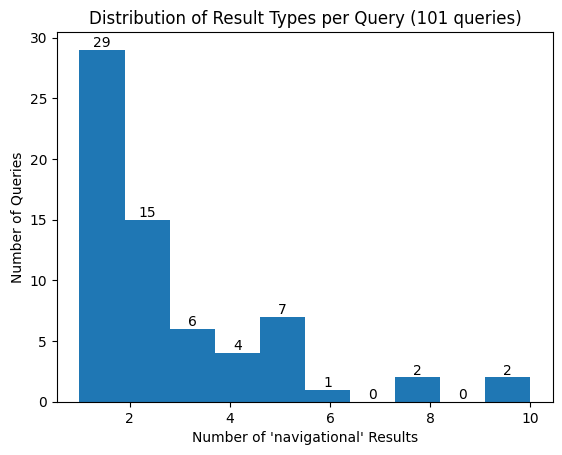

In [96]:
column = "Soort Resultaat"
value = "navigational"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

### Accessibility Distribution per Query

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_15830/3233662226.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '17'),
 Text(0, 0, '9'),
 Text(0, 0, '13'),
 Text(0, 0, '9'),
 Text(0, 0, '12'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

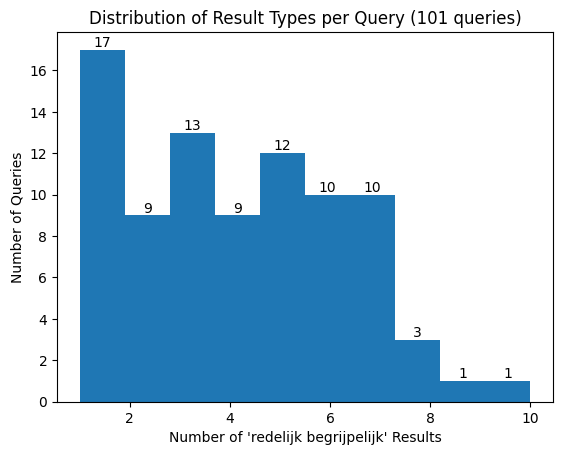

In [97]:
column = "Toegankelijkheid doelgroep (indruk)"
value = "redelijk begrijpelijk"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_15830/1130612084.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

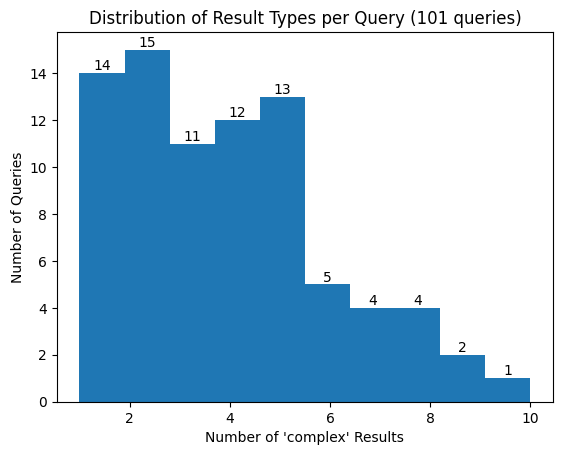

In [98]:
column = "Toegankelijkheid doelgroep (indruk)"
value = "complex"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

### Age

Text(0, 0.5, 'Number of Queries')

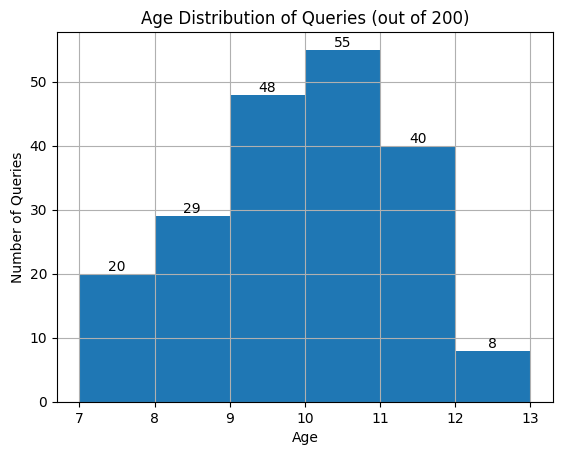

In [99]:
bins = range(all_queries["Leeftijd"].min(), all_queries["Leeftijd"].max() + 2)

hist = all_queries.hist(column="Leeftijd", bins=bins)
for ax in hist.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("Number of Queries")
    ax.bar_label(ax.containers[0])
ax.title.set_text(f"Age Distribution of Queries (out of {len(all_queries)})")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Queries")

### Query Length

[Text(0, 0, '108'),
 Text(0, 0, '50'),
 Text(0, 0, '22'),
 Text(0, 0, '10'),
 Text(0, 0, '2'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

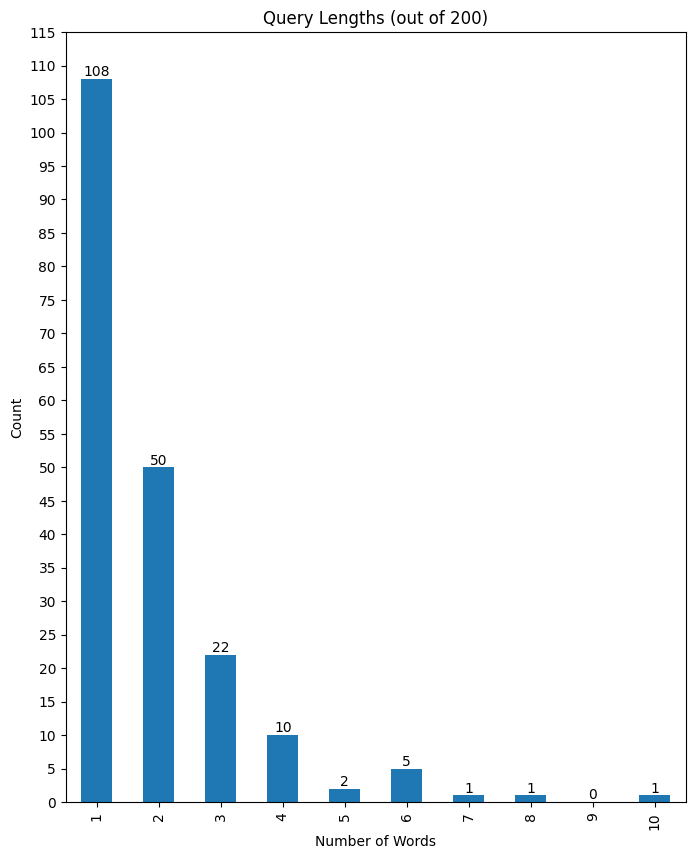

In [100]:
lengths = all_queries["Query"].str.strip().str.split().str.len().value_counts()
values = range(1, lengths.index.max() + 1)

ax = lengths.reindex(values, fill_value=0).plot(
    kind="bar",
    title=f"Query Lengths (out of {len(all_queries)})",
    ylabel="Count",
    xlabel="Number of Words",
    figsize=(8, 10),
    yticks=range(0, 120, 5),
)
ax.bar_label(ax.containers[0])

### Query Type

[Text(0, 0, '1'),
 Text(0, 0, '16'),
 Text(0, 0, '35'),
 Text(0, 0, '55'),
 Text(0, 0, '71')]

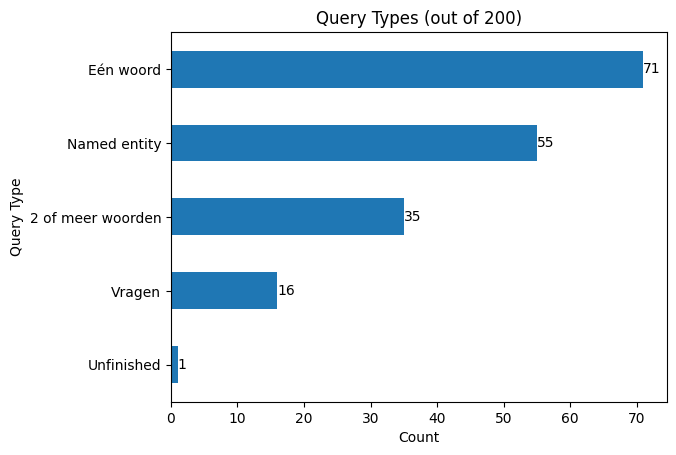

In [101]:
ax = (
    all_queries["Soort Query (select)"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Query Types (out of {len(all_queries)})",
        ylabel="Query Type",
        xlabel="Count",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '16'),
 Text(0, 0, '18'),
 Text(0, 0, '24'),
 Text(0, 0, '36')]

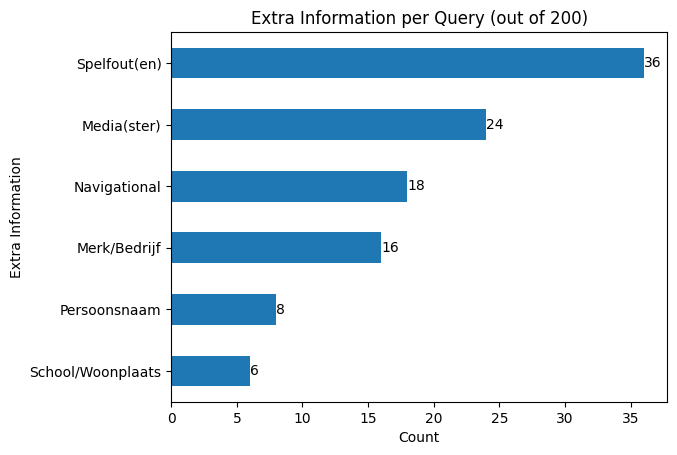

In [102]:
ax = (
    all_queries["Extra (multi)"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Extra Information per Query (out of {len(all_queries)})",
        xlabel="Count",
        ylabel="Extra Information",
    )
)
ax.bar_label(ax.containers[0])

### Result Page Extras

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '25'),
 Text(0, 0, '29'),
 Text(0, 0, '68'),
 Text(0, 0, '86')]

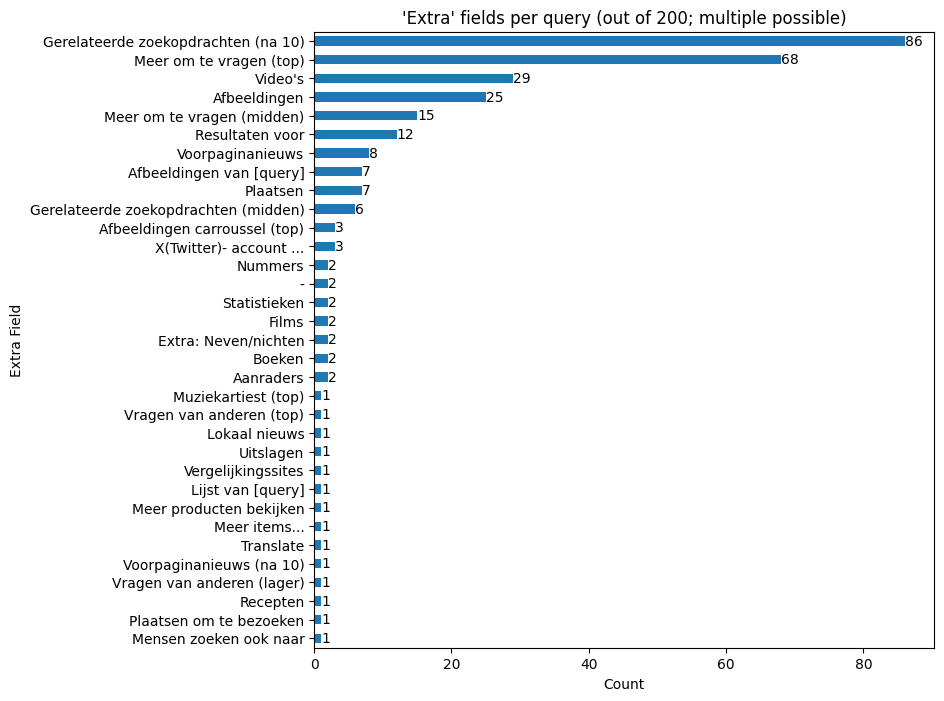

In [103]:
ax = (
    all_queries["Extra (top-down)"]
    .str.split(", ")
    .explode()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"'Extra' fields per query (out of {len(all_queries)}; multiple possible)",
        figsize=(8, 8),
        xlabel="Count",
        ylabel="Extra Field",
    )
)
ax.bar_label(ax.containers[0])